<center>
    

<h1 style='color:red'>(BÀI TẬP THỰC HÀNH - B1)</h1>
<h2 style='color:blu'>Họ và tên: Lê minh chiến</h2>
<h2 style='color:blu'>MSV: 2121050728</h2>   
</center>

---

**MÔ TẢ DỮ LIỆU:** Tệp dữ liệu insurance.csv chứa 1.338 mục và 7 cột. Dưới đây là chi tiết các thuộc tính trong tập dữ liệu:

1. age: Tuổi của người được bảo hiểm (kiểu số nguyên).
2. sex: Giới tính của người được bảo hiểm (dạng phân loại: 'male', 'female').
3. bmi: Chỉ số khối cơ thể, đo lường lượng mỡ cơ thể dựa trên chiều cao và cân nặng (kiểu số thực).
4. children: Số lượng con cái/người phụ thuộc được bảo hiểm (kiểu số nguyên).
5. smoker: Cho biết người đó có hút thuốc hay không (dạng phân loại: 'yes', 'no').
6. region: Vùng địa lý cư trú của người được bảo hiểm (dạng phân loại: 'southwest', 'southeast', 'northwest', 'northeast').
8. charges: Chi phí bảo hiểm y tế tính cho người đó (kiểu số thực).

**MỤC TIÊU**

1. thu thập đọc hiểu dữ liệu
2. xử lý và làm sạch tập dữ liệu
3. xây dựng mô hình hồi quy tuyến tính để dự đoán chi phí bảo hiểm y tế phải trả 

**I: thu thập đọc hiểu dữ liệu**

A: thu thập dữ liệu: tệp dữ liệu được thu thập trên github

B: đọc hiểu dữ liệu

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
data_charges = pd.read_csv('Data/insurance.csv')
data_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#hiển thị 5 dữ liệu đầu tiên
data_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#hiển thị 5 dữ liệu cuối
data_charges.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
#hiển thị 5 dữ liệu ngẫu nhiên
data_charges.sample(5)

,age,sex,bmi,children,smoker,region,charges
1163,18,female,28.215,0,no,northeast,2200.83085
236,18,female,26.730,0,no,southeast,1615.76670
19,30,male,35.300,0,yes,southwest,36837.46700
62,64,male,24.700,1,no,northwest,30166.61817
282,30,male,27.645,1,no,northeast,4237.12655


In [13]:
#Sử dụng describe để quan sát các thông số:
data_charges.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
data_charges.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**II: xử lý và làm sạch tập dữ liệu**

**A: xây dựng luồng công việc**

1. Khám phá dữ liệu (Exploratory Data Analysis - EDA):

- Kiểm tra các giá trị thiếu, giá trị trùng lặp và xử lý nếu có.
- Vẽ biểu đồ phân phối của các cột age, bmi, và charges.
- Tạo 4 biểu đồ tần suất cho các thuộc tính phân loại
- Phân tích mối quan hệ giữa các biến bằng ma trận tương quan.

2. Xử lý các giá trị ngoại lai:

- Sử dụng phương pháp IQR hoặc Z-score để phát hiện và xử lý các giá trị ngoại lai trong cột bmi và charges.

3. rời rạc hóa dữ liệu cột age và bmi 
4. Chuyển đổi các biến phân loại:

- Sử dụng Label Encoding hoặc One-Hot Encoding để chuyển các biến phân loại (sex, smoker, region) thành dạng số.
  
5. Chuẩn hóa dữ liệu (nếu cần):

- Sử dụng các kỹ thuật như StandardScaler hoặc MinMaxScaler để chuẩn hóa các cột như charges, đặc biệt khi dữ liệu không theo phân phối chuẩn.
  
6. kiểm tra, xác thực:

- Sau khi thực hiện 
làm sạch cần kiểm tra lại dữ liệu và đảm bảo rằng tất cả các 
yêu cầu và ràng buộc đã được thực thi, và thực thi đầy đủ trên 
dữ liệu thực 
tế7
6. Lưu trữ dữ liệu đã làm sạch:

- Sau khi hoàn tất, lưu trữ dữ liệu đã làm sạch để sử dụng trong các mô hình phân tích hoặc dự đoán.

**B: thực thi luồng công việc**

1. khám phá dữ liệu

In [27]:
# tạo bản sao của tập dữ liệu gốc 
data_missing = data_charges.copy()

In [29]:
# kiểm tra dữ liệu missing
data_missing.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

không có dữ liệu missing chúng ta không cần sử lý 

In [31]:
#kiểm tra dữ liệu trùng lặp
data_missing.duplicated().sum()

1

In [32]:
#hiển thị các dữ liệu trùng lặp
data_missing.loc[data_missing.duplicated(keep=False)].sort_values(by='age')

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [33]:
#xóa tất cả giữ liệu trùng lặp
data_duplicated = data_missing.drop_duplicates(keep=False)

In [34]:
#kiểm tra dữ liệu trùng lặp sau khi sử lý 
data_duplicated.duplicated().sum()

0

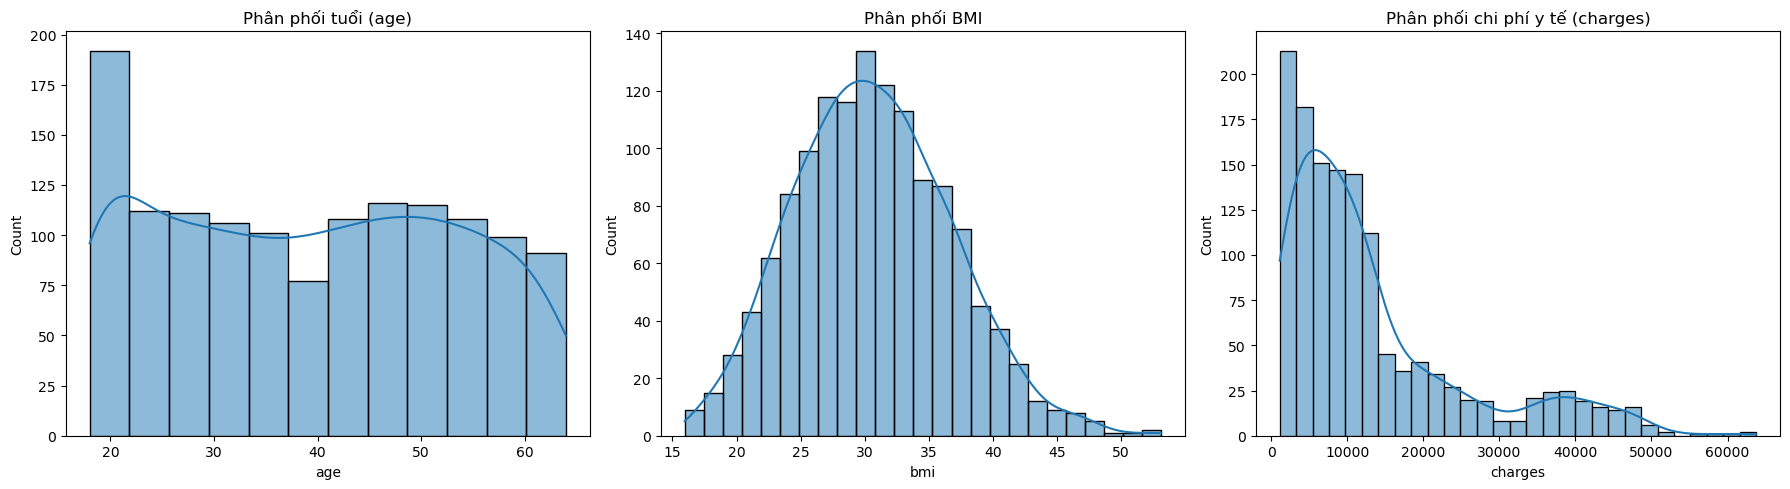

In [35]:
# vẽ biểu đồ phân phối của cột age, bmi, và charges.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Phân phối tuổi (age)
sns.histplot(data_duplicated['age'], kde=True, ax=axes[0])
axes[0].set_title('Phân phối tuổi (age)')

# Phân phối BMI
sns.histplot(data_duplicated['bmi'], kde=True, ax=axes[1])
axes[1].set_title('Phân phối BMI')

# Phân phối chi phí y tế (charges)
sns.histplot(data_duplicated['charges'], kde=True, ax=axes[2])
axes[2].set_title('Phân phối chi phí y tế (charges)')

plt.tight_layout()
plt.show()

**nhận xét:**

1. Tuổi (age):

- Nhận xét: Phân phối tuổi tương đối đều, cho thấy dữ liệu không tập trung quá nhiều vào bất kỳ nhóm tuổi nào. Điều này giúp dễ dàng phân tích sự tác động của tuổi lên các yếu tố khác.
  
2. BMI (Chỉ số khối cơ thể):

- Nhận xét: Phân phối của BMI hơi lệch về phía phải, cho thấy có nhiều người trong dataset có BMI nằm trong khoảng từ 25 đến 35. Điều này có thể phản ánh một nhóm lớn người bị thừa cân hoặc béo phì, vì BMI từ 25 trở lên thường được xem là thừa cân.
  
3. Chi phí y tế (charges):

- Nhận xét: Biểu đồ phân phối cho thấy chi phí y tế có độ lệch phải mạnh, nghĩa là hầu hết mọi người có chi phí y tế thấp hoặc trung bình, trong khi chỉ một số ít người có chi phí y tế rất cao. Điều này có thể phản ánh việc các bệnh nghiêm trọng hoặc các ca điều trị dài hạn có thể làm gia tăng đáng kể chi phí.

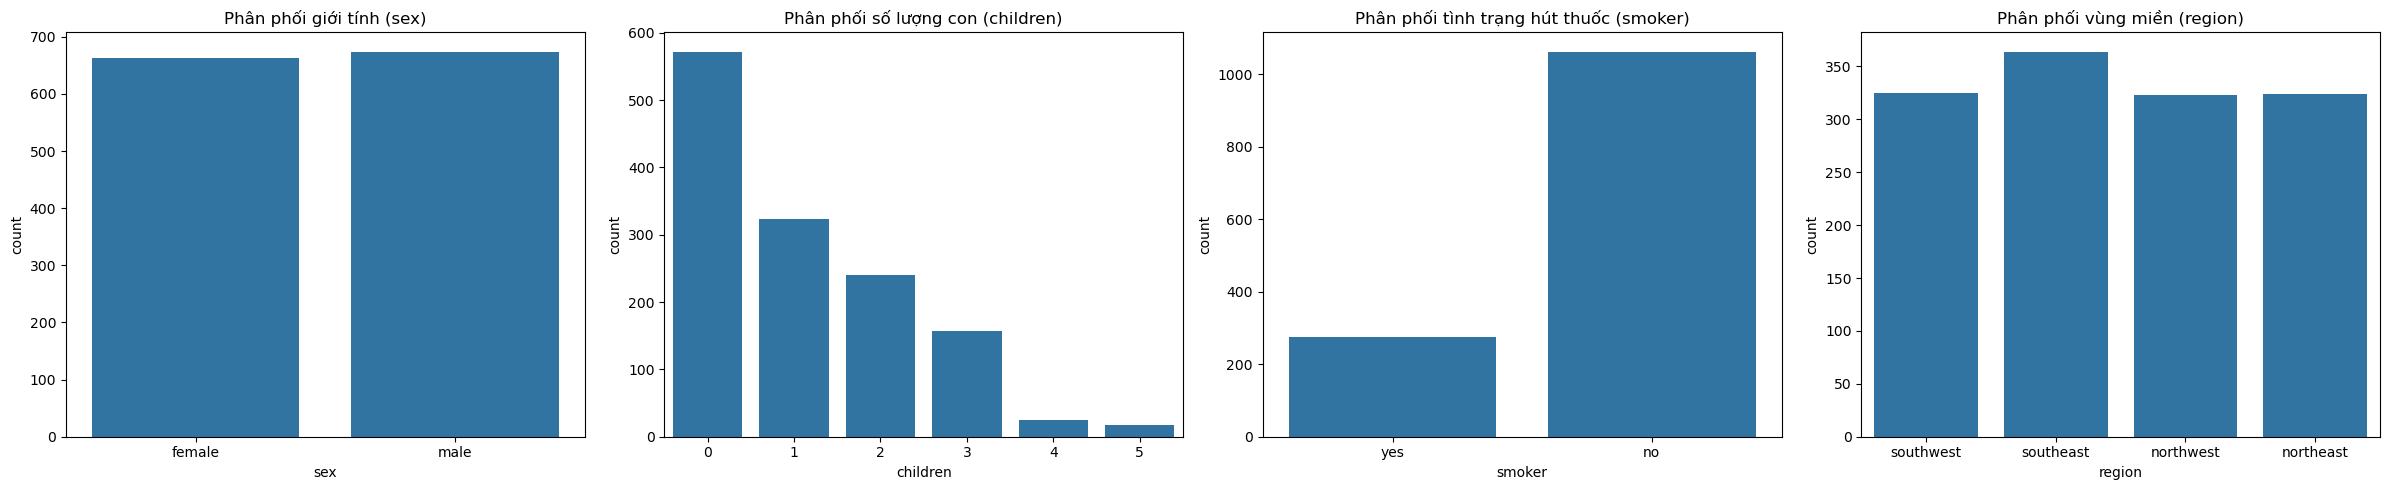

In [37]:
# Tạo 4 biểu đồ tần suất cho các thuộc tính phân loại
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Biểu đồ tần suất giới tính (sex)
sns.countplot(x=data_duplicated['sex'], ax=axes[0])
axes[0].set_title('Phân phối giới tính (sex)')

# Biểu đồ tần suất số lượng con (children)
sns.countplot(x=data_duplicated['children'], ax=axes[1])
axes[1].set_title('Phân phối số lượng con (children)')

# Biểu đồ tần suất tình trạng hút thuốc (smoker)
sns.countplot(x=data_duplicated['smoker'], ax=axes[2])
axes[2].set_title('Phân phối tình trạng hút thuốc (smoker)')

# Biểu đồ tần suất vùng miền (region)
sns.countplot(x=data_duplicated['region'], ax=axes[3])
axes[3].set_title('Phân phối vùng miền (region)')

plt.tight_layout()
plt.show()

**nhận xét:**
1. Giới tính (sex):

- Nhận xét: Số lượng nam và nữ trong dataset khá cân bằng, cho thấy dữ liệu này không bị lệch về một giới tính nhất định, do đó có thể phân tích mối quan hệ giữa giới tính và các yếu tố khác một cách công bằng.

2. Số lượng con (children):

- Nhận xét: Đa số các cá nhân trong dataset có từ 0 đến 2 con, với số lượng người có 3 con trở lên ít hơn hẳn. Điều này có thể gợi ý rằng những người có nhiều con ít phổ biến hơn trong dữ liệu này.
  
3. Tình trạng hút thuốc (smoker):

- Nhận xét: Số người không hút thuốc lớn hơn nhiều so với số người hút thuốc, điều này cho thấy tỷ lệ hút thuốc trong dữ liệu thấp hơn so với người không hút thuốc. Điều này có thể ảnh hưởng lớn đến mối quan hệ giữa tình trạng hút thuốc và chi phí y tế.
  
4. Vùng miền (region):

- Nhận xét: Dữ liệu được phân bố đồng đều giữa các khu vực. Không có sự khác biệt lớn về số lượng người từ các vùng khác nhau, cho phép việc so sánh tác động của vùng miền lên các yếu tố khác một cách khách quan.

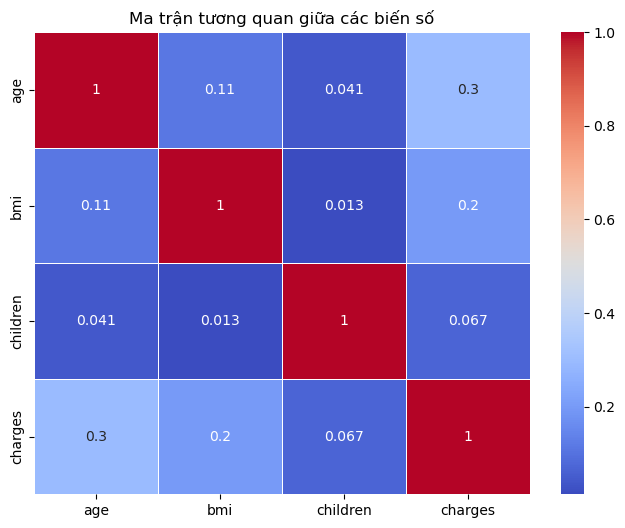

In [39]:
# Chỉ tính toán ma trận tương quan cho các cột dạng số
numeric_data = data_duplicated[['age', 'bmi', 'children', 'charges']]

# Tính ma trận tương quan
correlation_matrix = numeric_data.corr()

# Vẽ ma trận tương quan bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

**nhận xét**
  
1. Age và Charges:

- Nhận xét: Có một mối tương quan dương trung bình giữa tuổi và chi phí y tế, cho thấy khi tuổi tăng lên, chi phí y tế cũng có xu hướng tăng. Điều này là hợp lý vì người lớn tuổi có nhiều khả năng gặp vấn đề về sức khỏe hơn.

2. BMI và Charges:

- Nhận xét: Mối tương quan giữa BMI và chi phí y tế cũng có tính dương nhẹ. Điều này có thể gợi ý rằng chỉ số BMI cao hơn (người thừa cân hoặc béo phì) thường kéo theo chi phí y tế cao hơn, có thể do các vấn đề sức khỏe liên quan đến thừa cân.

3. Children và Charges:

Nhận xét: Mối tương quan giữa số lượng con và chi phí y tế là rất nhỏ hoặc không đáng kể. Điều này có nghĩa là số lượng con không có mối quan hệ rõ ràng với chi phí y tế trong dataset này.

4. Age và BMI:

Nhận xét: Mối tương quan giữa tuổi và BMI là rất thấp, cho thấy không có mối quan hệ rõ ràng giữa tuổi tác và chỉ số BMI trong dataset này.

**TỔNG KẾT**

- Qua các biểu đồ và phân tích ma trận tương quan, chúng ta thấy rằng cả tuổi tác và BMI đều có ảnh hưởng nhất định đến chi phí y tế, trong khi số lượng con không có mối tương quan rõ ràng. Thông tin về giới tính, tình trạng hút thuốc, và vùng miền cũng sẽ cần được phân tích thêm với các phương pháp khác để xác định mối quan hệ với chi phí y tế.

**2: sử lý giá trị ngoại lai**

In [35]:
data_nl = data_duplicated.copy()

In [36]:
#Quan sát đặc trưng thống kê:
data_nl.describe()

,age,bmi,children,charges
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.237275,30.663507,1.096557,13287.833731
std,14.038678,6.102752,1.205650,12110.702320
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4746.875675
50%,39.000000,30.380000,1.000000,9388.753650
75%,51.000000,34.700000,2.000000,16687.364100
max,64.000000,53.130000,5.000000,63770.428010


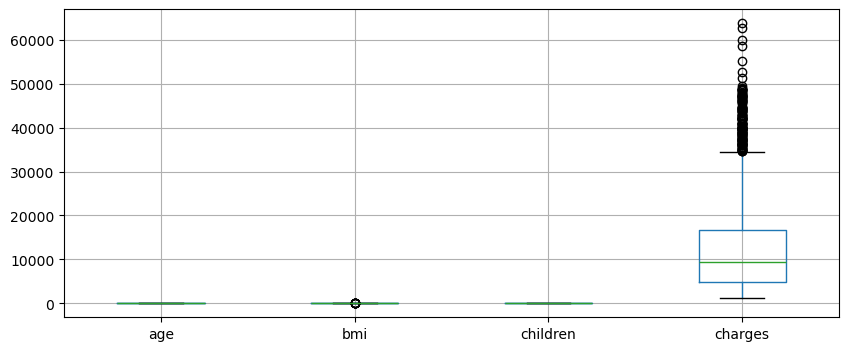

In [37]:
#Sử dụng biểu đồ boxplot để phát hiện ngoại lai:
plt.figure(figsize=(10,4))
data_nl.boxplot()
plt.ylabel('')
plt.show()

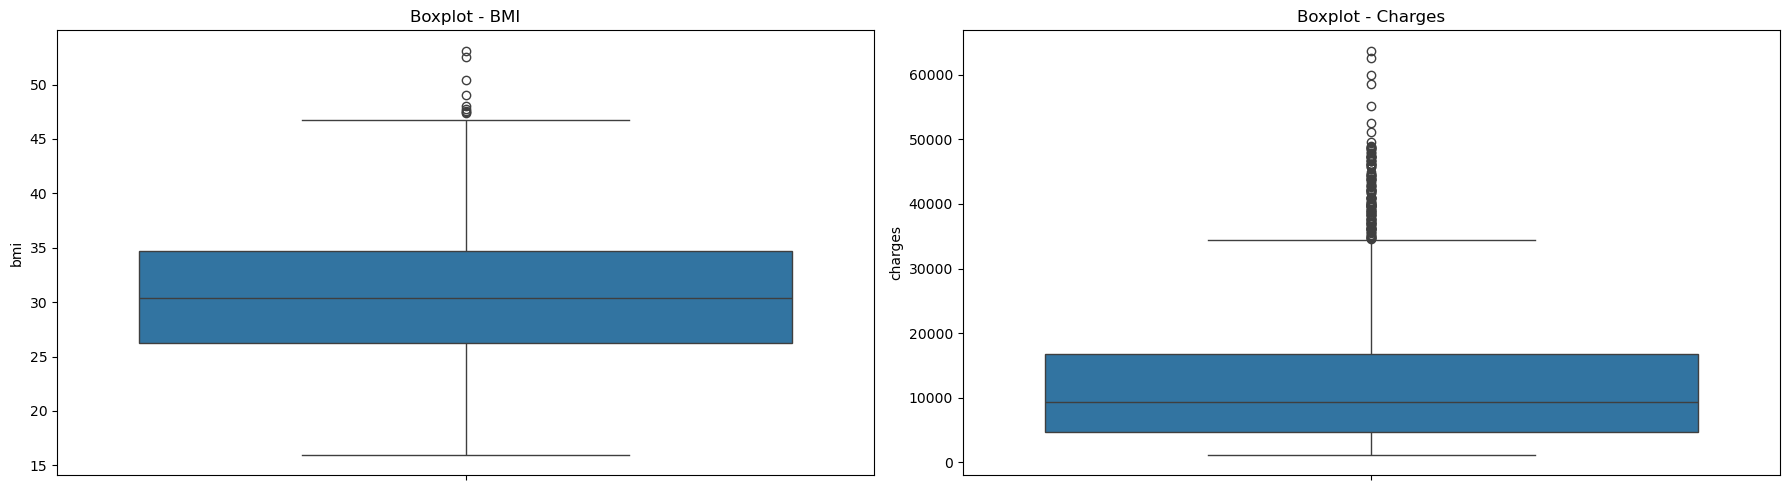

In [38]:
#Sử dụng biểu đồ boxplot để phát hiện ngoại lai:

fig, axes = plt.subplots(1, 2, figsize=(18, 5))


# Boxplot cho bmi
sns.boxplot(y=data_nl['bmi'], ax=axes[0])
axes[0].set_title('Boxplot - BMI')

# Boxplot cho charges
sns.boxplot(y=data_nl['charges'], ax=axes[1])
axes[1].set_title('Boxplot - Charges')

plt.tight_layout()
plt.show()


In [39]:
# Hàm để xác định và hiển thị ngoại lai
def show_outliers(data_nl, column):
    Q1 = data_nl[column].quantile(0.25)
    Q3 = data_nl[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Hiển thị các giá trị ngoại lai
    outliers = data_nl[(data_nl[column] < lower_bound) | (data_nl[column] > upper_bound)]
    print(f'Ngoại lai ở cột {column}:')
    return outliers[[column]]

# Hiển thị ngoại lai cho các cột charges
outliers_age = show_outliers(data_nl, 'age')
outliers_bmi = show_outliers(data_nl, 'bmi')
outliers_charges = show_outliers(data_nl, 'charges')

# In các giá trị ngoại lai
print(outliers_age)
print(outliers_bmi)
print(outliers_charges)


Ngoại lai ở cột age:
Ngoại lai ở cột bmi:
Ngoại lai ở cột charges:
Empty DataFrame
Columns: [age]
Index: []
        bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13
          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]


**nhận xét:**
- ta thấy một số ngoại lai ở cột bmi cột charges rất nhiều giá trị ngoại lai 

**phương án sử lý**

- chúng ta đang phân tích về những cá nhân có chi phí y tế thông thường, các trường hợp có chi phí y tế quá cao (có thể là do bệnh lý hiếm gặp hoặc tình trạng đặc biệt) sẽ làm nhiễu kết quả và không phù hợp với nhóm đối tượng chính. Loại bỏ các giá trị này sẽ giúp tập trung vào phân tích chính xác hơn.

In [42]:
def replace_outliers_with_bounds(data, column):
    # Tính toán các giá trị Q1 và Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Tính khoảng tứ phân vị (IQR)
    IQR = Q3 - Q1
    # Tính các giới hạn dưới và trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Thay thế các giá trị ngoại lệ nhỏ hơn lower_bound bằng lower_bound
    data.loc[data[column] < lower_bound, column] = lower_bound
    # Thay thế các giá trị ngoại lệ lớn hơn upper_bound bằng upper_bound
    data.loc[data[column] > upper_bound, column] = upper_bound
    
    return data





**Giải thích:**
Giới hạn dưới (lower_bound) và trên (upper_bound): Giá trị ngoại lai nhỏ hơn lower_bound sẽ được thay bằng chính lower_bound, và tương tự cho giá trị lớn hơn upper_bound.
Phương pháp này đảm bảo rằng tất cả các giá trị ngoại lai đều nằm trong phạm vi hợp lý của IQR.

In [44]:
# Thay thế ngoại lai trong các cột 'age', 'bmi', 'charges' bằng giá trị biên
columns_to_replace = ['bmi', 'charges']

for column in columns_to_replace:
    data_nl = replace_outliers_with_bounds(data_nl, column)

# Kiểm tra lại ngoại lai

print(show_outliers(data_nl, 'bmi'))
print(show_outliers(data_nl, 'charges'))



Ngoại lai ở cột bmi:
Empty DataFrame
Columns: [bmi]
Index: []
Ngoại lai ở cột charges:
Empty DataFrame
Columns: [charges]
Index: []


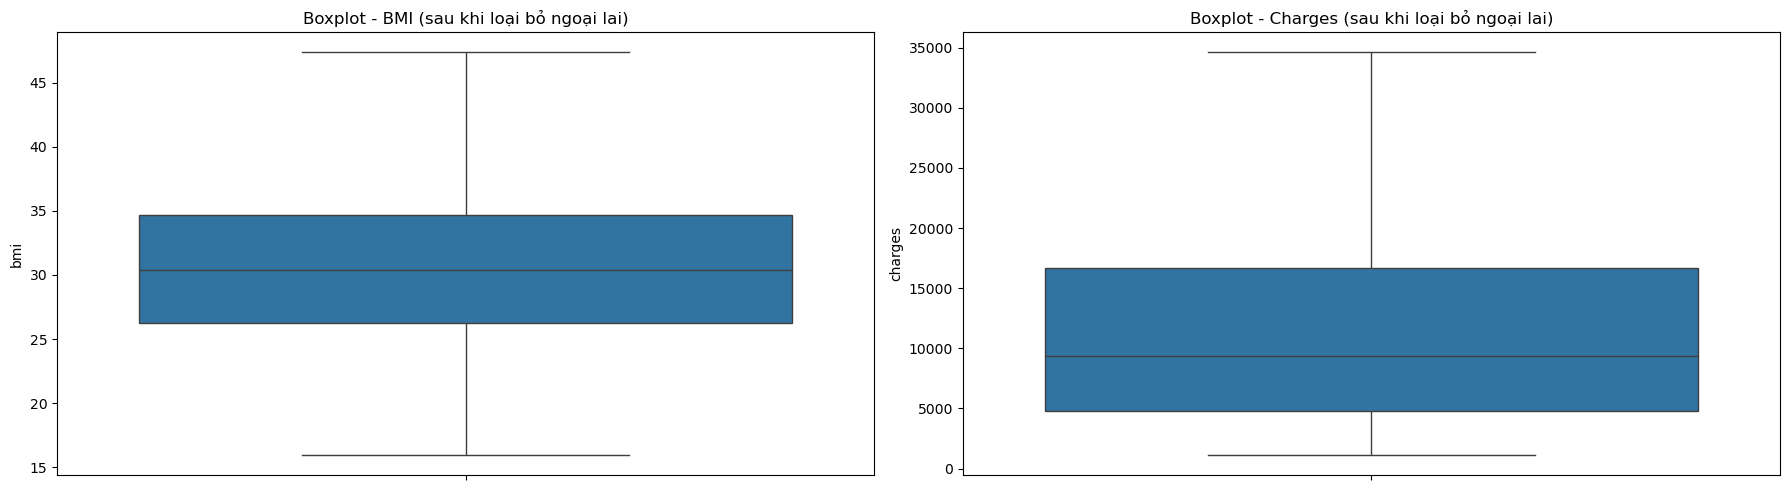

In [45]:
# Vẽ lại boxplot sau khi loại bỏ ngoại lai
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Boxplot cho bmi sau khi loại bỏ ngoại lai
sns.boxplot(y=data_nl['bmi'], ax=axes[0])
axes[0].set_title('Boxplot - BMI (sau khi loại bỏ ngoại lai)')

# Boxplot cho charges sau khi loại bỏ ngoại lai
sns.boxplot(y=data_nl['charges'], ax=axes[1])
axes[1].set_title('Boxplot - Charges (sau khi loại bỏ ngoại lai)')

plt.tight_layout()
plt.show()


In [46]:
data_nl

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**3: rời rạc hóa dữ liệu**

In [48]:
data_clean = data_nl.copy()

In [49]:
data_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [50]:
# Định nghĩa các nhóm tuổi
bins_age = [0, 12, 19, 65, 100]  # Các giới hạn cho các nhóm
labels_age = ['Trẻ_em', 'Thanh_thiếu_niên', 'Người_lớn', 'Người_cao_tuổi']  # Tên nhóm

# Tạo biến nhóm tuổi
data_clean['age_group'] = pd.cut(data_clean['age'], bins=bins_age, labels=labels_age, right=True)


In [51]:
# Định nghĩa các nhóm BMI
bins_bmi = [0, 18.5, 24.9, 29.9, 50]  # Các giới hạn cho các nhóm
labels_bmi = ['Thiếu_cân', 'Bình_thường', 'Thừa_cân', 'Béo_phì']  # Tên nhóm

# Tạo biến nhóm BMI
data_clean['bmi_group'] = pd.cut(data_clean['bmi'], bins=bins_bmi, labels=labels_bmi, right=True)


In [52]:
data_clean

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,Thanh_thiếu_niên,Thừa_cân
1,18,male,33.770,1,no,southeast,1725.55230,Thanh_thiếu_niên,Béo_phì
2,28,male,33.000,3,no,southeast,4449.46200,Người_lớn,Béo_phì
3,33,male,22.705,0,no,northwest,21984.47061,Người_lớn,Bình_thường
4,32,male,28.880,0,no,northwest,3866.85520,Người_lớn,Thừa_cân
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Người_lớn,Béo_phì
1334,18,female,31.920,0,no,northeast,2205.98080,Thanh_thiếu_niên,Béo_phì
1335,18,female,36.850,0,no,southeast,1629.83350,Thanh_thiếu_niên,Béo_phì
1336,21,female,25.800,0,no,southwest,2007.94500,Người_lớn,Thừa_cân


In [53]:
# Kiểm tra giá trị duy nhất trong cột 'age_group'
print(data_clean['age_group'].unique())


['Thanh_thiếu_niên', 'Người_lớn']
Categories (4, object): ['Trẻ_em' < 'Thanh_thiếu_niên' < 'Người_lớn' < 'Người_cao_tuổi']


In [54]:
data_clean['bmi_group'].unique()

['Thừa_cân', 'Béo_phì', 'Bình_thường', 'Thiếu_cân']
Categories (4, object): ['Thiếu_cân' < 'Bình_thường' < 'Thừa_cân' < 'Béo_phì']

In [55]:
# Kiểm tra tổng số lượng giá trị bị thiếu trong mỗi cột
data_clean.isnull().sum()


age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
age_group    0
bmi_group    0
dtype: int64

**4: Chuyển đổi các biến phân loại:**

In [57]:
data_mh = data_clean.copy()

In [58]:
data_mh['age_group'].unique()

['Thanh_thiếu_niên', 'Người_lớn']
Categories (4, object): ['Trẻ_em' < 'Thanh_thiếu_niên' < 'Người_lớn' < 'Người_cao_tuổi']

**cách thực hiện**

1. Biến "sex" (có hai giá trị: male, female):
- Label Encoding: Có thể được sử dụng vì chỉ có hai giá trị (0 cho male và 1 cho female). Điều này không gây ra vấn đề với hầu hết các mô hình, vì biến giới tính không có thứ tự quan trọng giữa các giá trị.
- One-Hot Encoding cũng có thể được sử dụng, nhưng với chỉ hai giá trị, Label Encoding là lựa chọn gọn gàng hơn.

2. Biến "smoker" (có hai giá trị: yes, no): Tương tự như biến sex, Label Encoding có thể được sử dụng vì chỉ có hai giá trị, với một giá trị được mã hóa là 0 và giá trị còn lại là 1.
3. Biến "region" (có bốn giá trị: southwest, southeast, northwest, northeast): One-Hot Encoding nên được sử dụng, vì region là biến không có thứ tự tự nhiên giữa các giá trị. One-Hot Encoding sẽ giúp mã hóa các vùng miền mà không làm mất đi mối quan hệ đồng nhất.
4. Biến "age_group" và "bmi_group": Đây là các biến phân loại có nhiều giá trị (ví dụ: Thanh_thiếu_niên, Người_lớn hoặc Béo_phì, Bình_thường), và chúng không có thứ tự tự nhiên rõ ràng. Vì vậy, One-Hot Encoding sẽ phù hợp hơn để tránh các giá trị này bị mô hình hiểu lầm là có thứ tự.


In [60]:
from sklearn.preprocessing import LabelEncoder
#thuộc tính sex và smoker
le = LabelEncoder()
data_mh['sex'] = le.fit_transform(data_mh['sex'])
data_mh['smoker'] = le.fit_transform(data_mh['smoker'])

#thuộc tính region, age_group và bmi_group
#thuộc tính region, age_group và bmi_group - không sử dụng drop_first
data_encoded = pd.get_dummies(data_mh, columns=['age_group', 'bmi_group', 'region'], drop_first=False)


data_encoded


,age,sex,bmi,children,smoker,charges,age_group_Trẻ_em,age_group_Thanh_thiếu_niên,age_group_Người_lớn,age_group_Người_cao_tuổi,bmi_group_Thiếu_cân,bmi_group_Bình_thường,bmi_group_Thừa_cân,bmi_group_Béo_phì,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,True,False,False,False,False,True,False,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False,False,False,False,False,True,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False,False,False,False,True,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,False,True,False,False,True,False,False,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,False,True,False,False,False,False,True,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,True,False,False,False,False,False,True,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False,False,False,False,False,True,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True,False,False,False,True,False,False,False,False,True


In [61]:
# Kiểm tra các cột sau khi thực hiện One-Hot Encoding
print(data_encoded.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'age_group_Trẻ_em', 'age_group_Thanh_thiếu_niên', 'age_group_Người_lớn',
       'age_group_Người_cao_tuổi', 'bmi_group_Thiếu_cân',
       'bmi_group_Bình_thường', 'bmi_group_Thừa_cân', 'bmi_group_Béo_phì',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')


In [62]:
# Loại bỏ cột không cần thiết
if 'age_group_Người_cao_tuổi' in data_encoded.columns:
    data_encoded.drop(columns=['age_group_Người_cao_tuổi'], inplace=True)


In [63]:
if 'age_group_Trẻ_em' in data_encoded.columns:
    data_encoded.drop(columns=['age_group_Trẻ_em'], inplace=True)

In [64]:
data_encoded

,age,sex,bmi,children,smoker,charges,age_group_Thanh_thiếu_niên,age_group_Người_lớn,bmi_group_Thiếu_cân,bmi_group_Bình_thường,bmi_group_Thừa_cân,bmi_group_Béo_phì,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,True,False,False,False,True,False,False,False,False,True
1,18,1,33.770,1,0,1725.55230,True,False,False,False,False,True,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False,False,False,True,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,True,False,False,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False,False,True,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False,False,True,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,True,False,False,False,False,True,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,True,False,False,True,False,False,False,False,True


**5: Chuẩn hóa dữ liệu**

- Scaling data là một quá trình trong khoa học dữ liệu và học máy, trong đó các giá trị của dữ liệu được chuyển đổi về một phạm vi nhất định để chuẩn bị cho các thuật toán phân tích hoặc mô hình học máy. Mục tiêu chính của việc scaling là đảm bảo rằng tất cả các đặc trưng (features) của dữ liệu có cùng tỷ lệ, giúp cải thiện độ chính xác và hiệu quả của các mô hình học máy.

In [67]:
data_scaling = data_encoded.copy()

In [68]:
#Quan sát đặc trưng thống kê số:
data_scaling.describe()

,age,sex,bmi,children,smoker,charges
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.237275,0.504491,30.650469,1.096557,0.205090,12506.910666
std,14.038678,0.500167,6.062410,1.205650,0.403918,10181.529929
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.272500,0.000000,0.000000,4746.875675
50%,39.000000,1.000000,30.380000,1.000000,0.000000,9388.753650
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16687.364100
max,64.000000,1.000000,47.341250,5.000000,1.000000,34598.096737


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Xử lý thuộc tính Age:
model_Age = scaler.fit(data_scaling[['age']])
data_scaling['age'] = model_Age.transform(data_scaling[['age']])

#Xử lý thuộc tính bmi:
model_bmi = scaler.fit(data_scaling[['bmi']])
data_scaling['bmi'] = model_Age.transform(data_scaling[['bmi']])

#Xử lý thuộc tính children:
model_children = scaler.fit(data_scaling[['children']])
data_scaling['children'] = model_Age.transform(data_scaling[['children']])

#Xử lý thuộc tính charges:
model_charges = scaler.fit(data_scaling[['charges']])
data_scaling['charges'] = model_Age.transform(data_scaling[['charges']])




data_scaling

,age,sex,bmi,children,smoker,charges,age_group_Thanh_thiếu_niên,age_group_Người_lớn,bmi_group_Thiếu_cân,bmi_group_Bình_thường,bmi_group_Thừa_cân,bmi_group_Béo_phì,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.380482,0.0,1,0.470873,True,False,False,False,True,False,False,False,False,True
1,0.000000,1,0.567536,0.2,0,0.018033,True,False,False,False,False,True,False,False,True,False
2,0.217391,1,0.542999,0.6,0,0.099402,False,True,False,False,False,True,False,False,True,False
3,0.326087,1,0.214937,0.0,0,0.623206,False,True,False,True,False,False,False,True,False,False
4,0.304348,1,0.411711,0.0,0,0.081998,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.478311,0.6,0,0.283146,False,True,False,False,False,True,False,True,False,False
1334,0.000000,0,0.508584,0.0,0,0.032384,True,False,False,False,False,True,True,False,False,False
1335,0.000000,0,0.665684,0.0,0,0.015174,True,False,False,False,False,True,False,False,True,False
1336,0.065217,0,0.313563,0.0,0,0.026469,False,True,False,False,True,False,False,False,False,True


In [70]:
data_scaling.describe()

,age,sex,bmi,children,smoker,charges
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,0.461680,0.504491,0.468129,0.219311,0.205090,0.340093
std,0.305189,0.500167,0.193186,0.241130,0.403918,0.304142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.328620,0.000000,0.000000,0.108286
50%,0.456522,1.000000,0.459510,0.200000,0.000000,0.246948
75%,0.717391,1.000000,0.597172,0.400000,0.000000,0.464972
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**6: kiểm tra xác thực**

In [72]:
data_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1336 entries, 0 to 1337
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1336 non-null   float64
 1   sex                         1336 non-null   int32  
 2   bmi                         1336 non-null   float64
 3   children                    1336 non-null   float64
 4   smoker                      1336 non-null   int32  
 5   charges                     1336 non-null   float64
 6   age_group_Thanh_thiếu_niên  1336 non-null   bool   
 7   age_group_Người_lớn         1336 non-null   bool   
 8   bmi_group_Thiếu_cân         1336 non-null   bool   
 9   bmi_group_Bình_thường       1336 non-null   bool   
 10  bmi_group_Thừa_cân          1336 non-null   bool   
 11  bmi_group_Béo_phì           1336 non-null   bool   
 12  region_northeast            1336 non-null   bool   
 13  region_northwest            1336 non-n

In [73]:
data_scaling.describe()

,age,sex,bmi,children,smoker,charges
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,0.461680,0.504491,0.468129,0.219311,0.205090,0.340093
std,0.305189,0.500167,0.193186,0.241130,0.403918,0.304142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.328620,0.000000,0.000000,0.108286
50%,0.456522,1.000000,0.459510,0.200000,0.000000,0.246948
75%,0.717391,1.000000,0.597172,0.400000,0.000000,0.464972
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


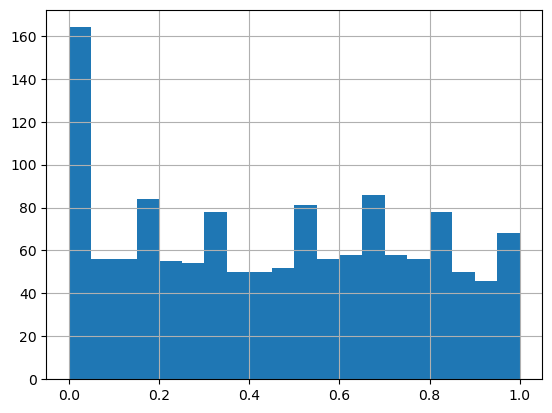

In [74]:
#Vẽ biểu đồ phân phối
data_scaling['age'].hist(bins=20)

plt.show()


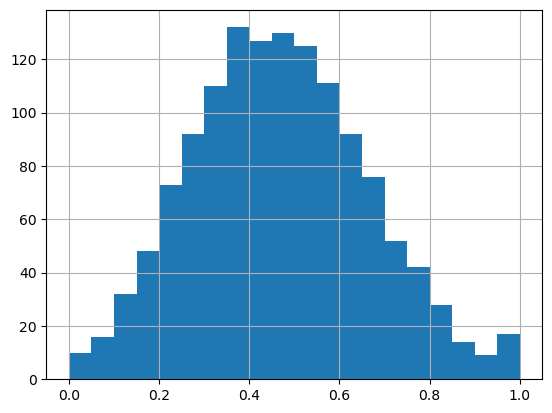

In [75]:
data_scaling['bmi'].hist(bins=20)

plt.show()

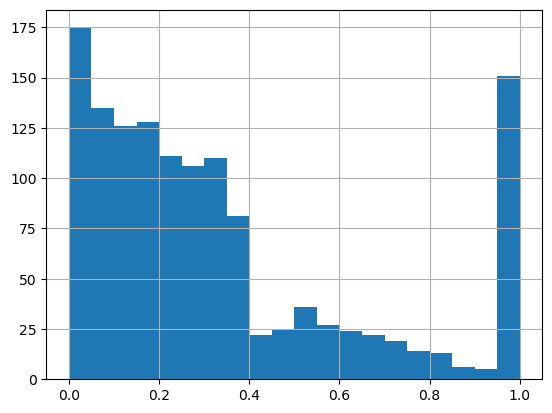

In [76]:
data_scaling['charges'].hist(bins=20)
plt.show()

**6: lưu file đã sạch sẽ**


In [78]:
data_scaling.to_csv('Data/Data_insurance_OK.csv')

**III: xây dựng mô hình hồi quy tuyến tính**

**A:  XÂY DỰNG MÔ HÌNH**

In [81]:
df = pd.read_csv('Data/Data_insurance_OK.csv')
df

,Unnamed: 0,age,sex,bmi,children,smoker,charges,age_group_Thanh_thiếu_niên,age_group_Người_lớn,bmi_group_Thiếu_cân,bmi_group_Bình_thường,bmi_group_Thừa_cân,bmi_group_Béo_phì,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0.021739,0,0.380482,0.0,1,0.470873,True,False,False,False,True,False,False,False,False,True
1,1,0.000000,1,0.567536,0.2,0,0.018033,True,False,False,False,False,True,False,False,True,False
2,2,0.217391,1,0.542999,0.6,0,0.099402,False,True,False,False,False,True,False,False,True,False
3,3,0.326087,1,0.214937,0.0,0,0.623206,False,True,False,True,False,False,False,True,False,False
4,4,0.304348,1,0.411711,0.0,0,0.081998,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1333,0.695652,1,0.478311,0.6,0,0.283146,False,True,False,False,False,True,False,True,False,False
1332,1334,0.000000,0,0.508584,0.0,0,0.032384,True,False,False,False,False,True,True,False,False,False
1333,1335,0.000000,0,0.665684,0.0,0,0.015174,True,False,False,False,False,True,False,False,True,False
1334,1336,0.065217,0,0.313563,0.0,0,0.026469,False,True,False,False,True,False,False,False,False,True


In [82]:
correlation_matrix = df.corr()
print(correlation_matrix['charges'].sort_values(ascending=False))

charges                       1.000000
smoker                        0.786204
age                           0.311238
bmi_group_Béo_phì             0.165701
bmi                           0.161619
age_group_Người_lớn           0.136315
children                      0.071638
region_southeast              0.059281
sex                           0.054161
region_northeast              0.016205
Unnamed: 0                   -0.005982
region_northwest             -0.032662
region_southwest             -0.045109
bmi_group_Thiếu_cân          -0.047794
bmi_group_Bình_thường        -0.092041
bmi_group_Thừa_cân           -0.094228
age_group_Thanh_thiếu_niên   -0.136315
Name: charges, dtype: float64


**nhận xét**

1. Biến có tương quan cao hoặc trung bình:
Các biến này có ảnh hưởng đáng kể đến biến mục tiêu charges, vì vậy bạn nên giữ lại:
- smoker (0.786204): Có tương quan cao với charges, là một biến quan trọng.
- age (0.311238): Tương quan trung bình, cũng là yếu tố quan trọng trong việc xác định chi phí bảo hiểm.
- bmi (0.161619): Tương quan dương với chi phí, cần giữ lại.
- bmi_group_Béo_phì (0.141948): Mức độ tương quan vừa phải, có thể giúp mô hình cải thiện độ chính xác.
- age_group_Người_lớn (0.136315): Có ảnh hưởng nhất định và nên giữ lại.
  
2. Biến có tương quan thấp hoặc rất thấp:
Những biến này có tương quan rất thấp với charges và có thể được loại bỏ để đơn giản hóa mô hình:
- children (0.071638): Ảnh hưởng thấp, có thể giữ lại nếu bạn thấy nó cần thiết, nhưng không bắt buộc.
- region_southeast (0.059281): Ảnh hưởng nhỏ, có thể loại bỏ.
- sex (0.054161): Ảnh hưởng nhỏ, có thể cân nhắc loại bỏ.
- Unnamed: 0 (-0.005982): Hoàn toàn không có giá trị, nên loại bỏ.
- region_northwest (-0.032662), region_southwest (-0.045109): Ảnh hưởng không đáng kể, có thể loại bỏ.
- bmi_group_Bình_thường (-0.092041), bmi_group_Thừa_cân (-0.094228): Ảnh hưởng không đáng kể, có thể loại bỏ.
- age_group_Thanh_thiếu_niên (-0.136315): Ảnh hưởng âm nhỏ, có thể loại bỏ.
  
3. Biến có giá trị NaN:
- age_group_Người_cao_tuổi: Do có giá trị NaN, bạn có thể loại bỏ biến này vì nó không cung cấp thông tin có giá trị cho mô hình.
  
**Kết luận:**
- Giữ lại các biến: smoker, age, bmi, bmi_group_Béo_phì, age_group_Người_lớn.
- Có thể giữ hoặc loại bỏ (cân nhắc): children, region_southeast, sex.
- Nên loại bỏ các biến: Unnamed: 0, region_northwest, region_southwest, bmi_group_Bình_thường, bmi_group_Thừa_cân, age_group_Thanh_thiếu_niên, age_group_Người_cao_tuổi (NaN).

In [84]:
df

,Unnamed: 0,age,sex,bmi,children,smoker,charges,age_group_Thanh_thiếu_niên,age_group_Người_lớn,bmi_group_Thiếu_cân,bmi_group_Bình_thường,bmi_group_Thừa_cân,bmi_group_Béo_phì,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0.021739,0,0.380482,0.0,1,0.470873,True,False,False,False,True,False,False,False,False,True
1,1,0.000000,1,0.567536,0.2,0,0.018033,True,False,False,False,False,True,False,False,True,False
2,2,0.217391,1,0.542999,0.6,0,0.099402,False,True,False,False,False,True,False,False,True,False
3,3,0.326087,1,0.214937,0.0,0,0.623206,False,True,False,True,False,False,False,True,False,False
4,4,0.304348,1,0.411711,0.0,0,0.081998,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1333,0.695652,1,0.478311,0.6,0,0.283146,False,True,False,False,False,True,False,True,False,False
1332,1334,0.000000,0,0.508584,0.0,0,0.032384,True,False,False,False,False,True,True,False,False,False
1333,1335,0.000000,0,0.665684,0.0,0,0.015174,True,False,False,False,False,True,False,False,True,False
1334,1336,0.065217,0,0.313563,0.0,0,0.026469,False,True,False,False,True,False,False,False,False,True


In [85]:
dt = df.drop(['Unnamed: 0','children',
              'region_northeast', 'region_northwest',
              'region_southeast', 'region_southwest', 'age_group_Thanh_thiếu_niên',
              'bmi_group_Thiếu_cân', 'bmi_group_Bình_thường', 'bmi_group_Thừa_cân',
              ], axis=1)

In [86]:
dt.head()

,age,sex,bmi,smoker,charges,age_group_Người_lớn,bmi_group_Béo_phì
0,0.021739,0,0.380482,1,0.470873,False,False
1,0.000000,1,0.567536,0,0.018033,False,True
2,0.217391,1,0.542999,0,0.099402,True,True
3,0.326087,1,0.214937,0,0.623206,True,False
4,0.304348,1,0.411711,0,0.081998,True,False


In [259]:
X = dt[["age", "smoker", "bmi_group_Béo_phì"]]  # Các biến đầu vào
y = dt[["charges"]]

In [261]:
from statsmodels.formula.api import ols


In [263]:
ols_formula = "charges ~ age + smoker + bmi_group_Béo_phì"

In [265]:
ols_data = pd.concat([X, y], axis =1)
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [267]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1308.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:10:38   Log-Likelihood:                 611.87
No. Observations:                1336   AIC:                            -1216.
Df Residuals:                    1332   BIC:                            -1195.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0260      0.009      2.933      0.003       0.009       0.043
bmi_group_Béo_phì[T.True]     0.0827      0.008      9.797      0.000       0.066       0.099
age                           0.3189      0.014     23.098      0.000       0.292       0.346
smoker                        0.5981      0.010     57.561      0.000       0.578       0.618
==============================================================================
Omnibus:                      508.735   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1823.745
Skew:                           1.872   Prob(JB):                         0.00
Kurtosis:                       7.330   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**nhận xét**
  
1. Thông số mô hình:
- R-squared (R²) và Adjusted R-squared:

  + R-squared: 0.747: Khoảng 74.7% biến động của biến mục tiêu charges được giải thích bởi các biến độc lập trong mô hình. Đây là một mức độ giải thích khá cao, cho thấy mô hình có khả năng dự đoán tốt.
  + Adjusted R-squared: 0.746: Điều chỉnh cho số lượng biến trong mô hình, cho thấy mức độ phù hợp vẫn rất cao ngay cả khi có thêm biến.
- F-statistic và Prob (F-statistic):

  + F-statistic: 655.5 với giá trị p rất nhỏ (0.00): Điều này cho thấy rằng ít nhất một trong các biến độc lập có mối liên hệ thống kê với biến mục tiêu. Mô hình tổng thể là có ý nghĩa.
- Số lượng quan sát:

  + No. Observations: 1336: Có đủ dữ liệu để thực hiện phân tích hồi quy, giúp tăng độ tin cậy của kết quả.
    
2. Hệ số hồi quy (Coefficients):
- Intercept (Hằng số): Hằng số là 0.0217, có thể không có ý nghĩa trong ngữ cảnh thực tế vì không thể hiện giá trị khi tất cả các biến khác bằng 0.
- age_group_Người_lớn:Hệ số: -0.0186 (p-value = 0.245): Không có ý nghĩa thống kê. Điều này cho thấy nhóm tuổi lớn không ảnh hưởng đến charges trong mô hình.
- bmi_group_Béo_phì: Hệ số: 0.0626 (p-value = 0.000): Có ý nghĩa thống kê. Điều này cho thấy rằng việc thuộc nhóm Béo phì có liên quan đến chi phí bảo hiểm cao hơn, với sự gia tăng 0.0626 trong charges.
- age: Hệ số: 0.3262 (p-value = 0.000): Có ý nghĩa thống kê. Điều này cho thấy rằng với mỗi năm tuổi, charges tăng lên khoảng 0.3262, cho thấy rằng tuổi tác có ảnh hưởng đáng kể đến chi phí bảo hiểm.
- sex: Hệ số: -0.0039 (p-value = 0.641): Không có ý nghĩa thống kê. Điều này cho thấy giới tính không có ảnh hưởng đáng kể đến charges.
- bmi: Hệ số: 0.0647 (p-value = 0.076): Có ý nghĩa gần đúng. Điều này cho thấy rằng BMI cao hơn có thể dẫn đến chi phí bảo hiểm cao hơn, nhưng giá trị p không đạt mức ý nghĩa 0.05.
- smoker: Hệ số: 0.5984 (p-value = 0.000): Có ý nghĩa thống kê mạnh mẽ. Điều này cho thấy người hút thuốc có chi phí bảo hiểm cao hơn khoảng 0.5984 so với những người không hút thuốc, cho thấy tác động lớn của thói quen hút thuốc đến chi phí.

3. Các chỉ số khác:
- Omnibus, Skew, Kurtosis:
  + Kiểm tra độ phân phối của các sai số trong mô hình. Với giá trị Prob(Omnibus) và Prob(JB) rất thấp, điều này cho thấy rằng phân phối của các sai số không phải là chuẩn (không thỏa mãn giả định của hồi quy tuyến tính).
  + Skew = 1.882: Phân phối lệch phải.
  + Kurtosis = 7.331: Đánh dấu phân phối có độ cao hơn mức chuẩn (độ nhọn).
  + Durbin-Watson = 2.093: Gần 2, điều này cho thấy không có sự tự tương quan (autocorrelation) giữa các sai số, đây là điều tốt cho mô hình hồi quy.

**Kết luận:**
- Mô hình hồi quy đã chỉ ra rằng các yếu tố như độ tuổi, tình trạng hút thuốc, và nhóm BMI Béo phì có ảnh hưởng đáng kể đến chi phí bảo hiểm (charges).
- Mặc dù một số biến không có ý nghĩa thống kê (như age_group_Người_lớn và sex), nhưng các biến khác đã thể hiện rõ mối liên hệ với biến mục tiêu.
- Cần xem xét lại cách phân phối của các sai số và có thể áp dụng các phương pháp để cải thiện mô hình, chẳng hạn như sử dụng phương pháp hồi quy khác hoặc xử lý thêm dữ liệu để đạt được phân phối chuẩn hơn.

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [272]:
#tính toán các chỉ số
y_pred_linear = model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print('----------')
print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R2: {r2_linear}")

----------
MAE: 0.09722242242380921
MSE: 0.02205391283980735
RMSE: 0.1485055986816906
R2: 0.7529348912349285


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [274]:
model = LinearRegression()

# Huấn luyện mô hình với tập dữ liệu huấn luyện
model.fit(X_train, y_train)

LinearRegression()

In [276]:
print("hệ số hồi quy:", model.coef_)
print("hệ số chặn:", model.intercept_)
print("điểm số r2:", model.score(X_train, y_train))
print("số lượng đặc trưng:", model.n_features_in_)

hệ số hồi quy: [[0.3102752  0.60612621 0.08868407]]
hệ số chặn: [0.02759859]
điểm số r2: 0.7441944034594374
số lượng đặc trưng: 3


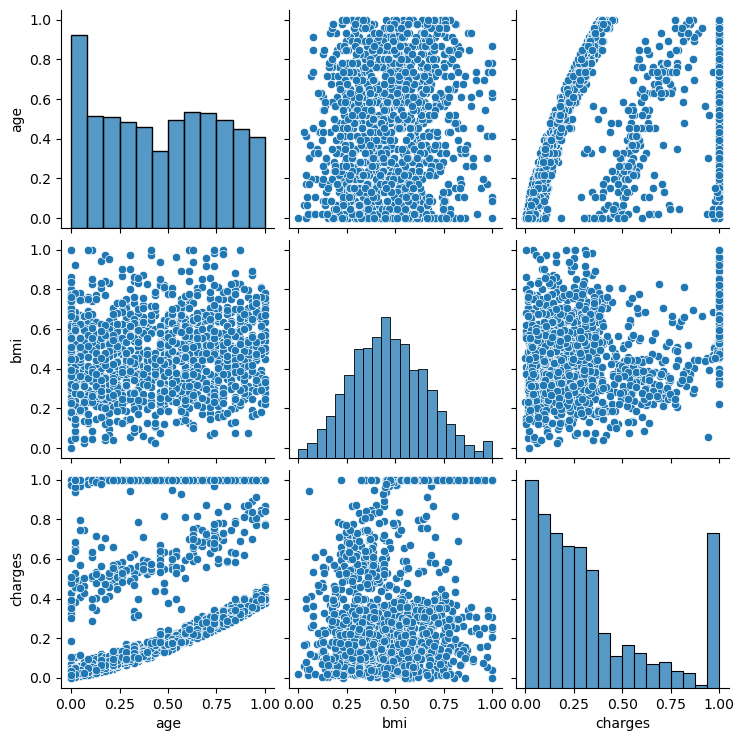

In [278]:
#kiểm tra tính tuyến tính
sns.pairplot(dt[['age', 'bmi', 'charges']])

**nhận xét:**

1. Phân phối của các biến:

- age, bmi, và charges đều có các biểu đồ histogram cho thấy sự phân phối của chúng.
- Phân phối của age có xu hướng khá đồng đều, nhưng có một số giá trị cao ở những độ tuổi nhất định.
- bmi có phân phối dạng hình chuông, gần với phân phối chuẩn.
- charges có sự phân bố không đối xứng, với nhiều giá trị thấp và một số giá trị cao.

2. ương quan giữa các biến:

- Tương quan giữa age và charges cho thấy một mối quan hệ phi tuyến tính, với xu hướng tăng dần của charges khi age tăng.
- Tương quan giữa bmi và charges không có mô hình rõ ràng, nhưng có thể thấy một số cụm dữ liệu.
- Tương quan giữa age và bmi không rõ ràng, cho thấy rằng hai biến này không có mối quan hệ tuyến tính mạnh.

3. Kiểm tra tính tuyến tính:

- Mối quan hệ giữa age và charges có vẻ phi tuyến tính, với xu hướng charges tăng mạnh sau một ngưỡng tuổi nhất định.
- Đối với bmi và charges, mối quan hệ khá phân tán, và có vẻ như không tuyến tính rõ ràng.
- Có thể cần phải thực hiện thêm các kiểm tra thống kê, hoặc sử dụng các mô hình phi tuyến tính nếu mối quan hệ giữa các biến không tuân theo tính tuyến tính.

**Nhận xét tổng quan:**

- Mối quan hệ giữa age và charges có thể được cải thiện bằng cách thử các phép biến đổi phi tuyến như bình phương (age_squared), logarit (log_age).
- bmi có thể có tương tác với các biến khác, vì vậy cần xem xét việc tạo ra các biến tương tác hoặc phân loại để bắt được tác động của nó.
- charges bị lệch phải có thể cần được chuẩn hóa bằng cách lấy log (log_charges) để giảm thiểu sự ảnh hưởng của các điểm ngoại lai và giúp mối quan hệ với các biến khác rõ ràng hơn.
- không có tính tuyến tính rõ dàng 

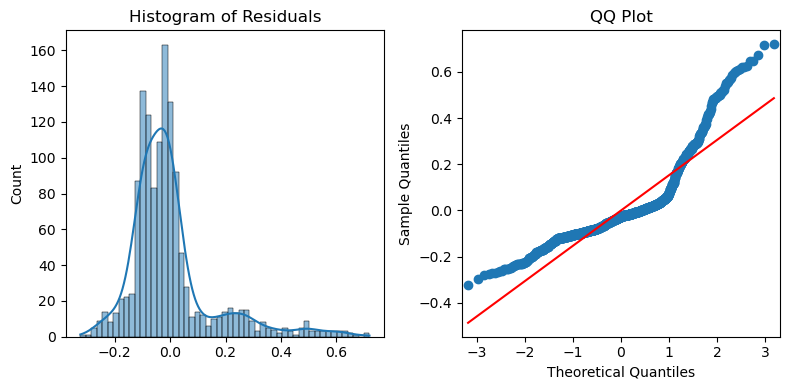

In [280]:
import statsmodels.formula.api as smf

# Giả sử bạn có dữ liệu trong DataFrame your_data
model = ols(formula = ols_formula, data = ols_data).fit()
residuals = model.resid

# Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Histogram
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Residuals')

# QQ-plot
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()


**nhận xét:**
1. Histogram of Residuals:

- Hình dáng phân phối: Biểu đồ này cho thấy rằng phân phối của các sai số không theo hình dạng chuẩn (normal distribution). Nó có vẻ bị lệch (skewed) về phía bên trái, với một số lượng lớn các giá trị sai số nhỏ và một số ít các giá trị sai số lớn.
- Biên độ: Có vẻ như có một số lượng lớn các sai số trong khoảng từ -0.2 đến 0.2, trong khi một số sai số vượt ra ngoài khoảng này, điều này có thể chỉ ra rằng có một số giá trị ngoại lai hoặc mô hình có thể không phù hợp hoàn toàn với dữ liệu.

2. QQ Plot:

- Đường thẳng đỏ: Đường thẳng đại diện cho phân phối chuẩn. Nếu các điểm trong QQ plot nằm gần đường này, điều đó có nghĩa là sai số có phân phối gần với phân phối chuẩn.
- Phân phối không chuẩn: Các điểm trong biểu đồ QQ cho thấy rằng sai số nằm dưới đường thẳng ở phía bên trái (nghĩa là sai số âm lớn hơn) và nằm trên đường thẳng ở phía bên phải (nghĩa là sai số dương lớn hơn). Điều này cho thấy rằng phân phối của các sai số không phải là chuẩn.

**Kết luận:**
- Vi phạm giả định: Cả hai biểu đồ đều cho thấy rằng phân phối của các sai số không thỏa mãn giả định của hồi quy tuyến tính về tính chuẩn (normality). Điều này có thể ảnh hưởng đến độ tin cậy của các kết quả hồi quy.
- Giải pháp: Bạn có thể cần xem xét các phương pháp biến đổi (như log transformation), hoặc thử nghiệm các mô hình hồi quy khác (như hồi quy tổng quát) để cải thiện tính phù hợp và độ chính xác của mô hình của mình.

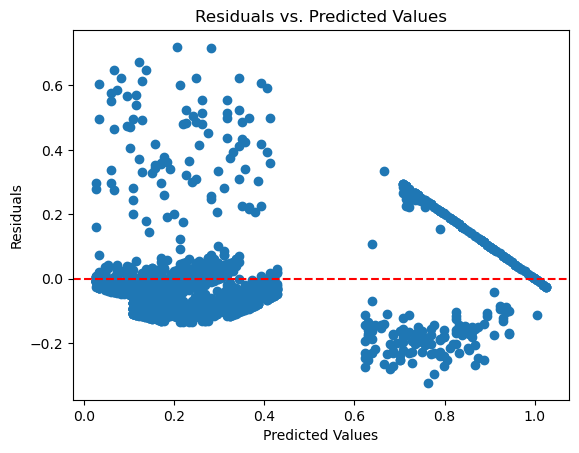

In [283]:
# tính đồng nhất
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

**nhận xét**
1. Tổng quan hình dạng:

- Các điểm dữ liệu phân tán không đều xung quanh đường cơ sở (dotted red line), cho thấy rằng có sự không đồng nhất trong phân phối của residuals.

2. Sự phân tán:

- Có hai cụm điểm phân tán ở hai bên của trục ngang (predicted values):
  + Một cụm điểm nằm chủ yếu trong khoảng từ -0.2 đến 0, cho thấy rằng đối với một số giá trị dự đoán thấp, residuals có xu hướng âm.
  + Một cụm điểm khác nằm ở phía trên đường cơ sở (đường đỏ), cho thấy rằng các giá trị dự đoán cao hơn có xu hướng có residual dương, nhưng lại có ít điểm nằm trong khoảng này.

3. Xu hướng phi tuyến tính:

- Có một sự xuất hiện của các điểm nằm ở phần bên phải của biểu đồ với xu hướng giảm dần. Điều này có thể chỉ ra rằng mô hình không bắt được mối quan hệ phi tuyến giữa các biến độc lập và biến phụ thuộc.

4. Sự không đồng nhất:

- Sự phân tán không đều cho thấy có thể có vấn đề với tính đồng nhất của phương sai (homoscedasticity). Các residuals không phân phối ngẫu nhiên xung quanh đường cơ sở có thể dẫn đến các ước lượng không chính xác.

**Kết luận:**
- Mô hình cần cải thiện: Biểu đồ này cho thấy rằng mô hình hồi quy có thể không hoàn toàn phù hợp với dữ liệu. Có khả năng cần thử nghiệm với các biến đổi khác hoặc các mô hình phức tạp hơn (như hồi quy phi tuyến) để cải thiện khả năng dự đoán.
- Kiểm tra các giả định: Cần kiểm tra lại các giả định của hồi quy tuyến tính, bao gồm tính đồng nhất của phương sai và phân phối chuẩn của residuals.
- Hành động tiếp theo: Cân nhắc sử dụng các phương pháp biến đổi như log hoặc power transformation để cải thiện độ phù hợp của mô hình.

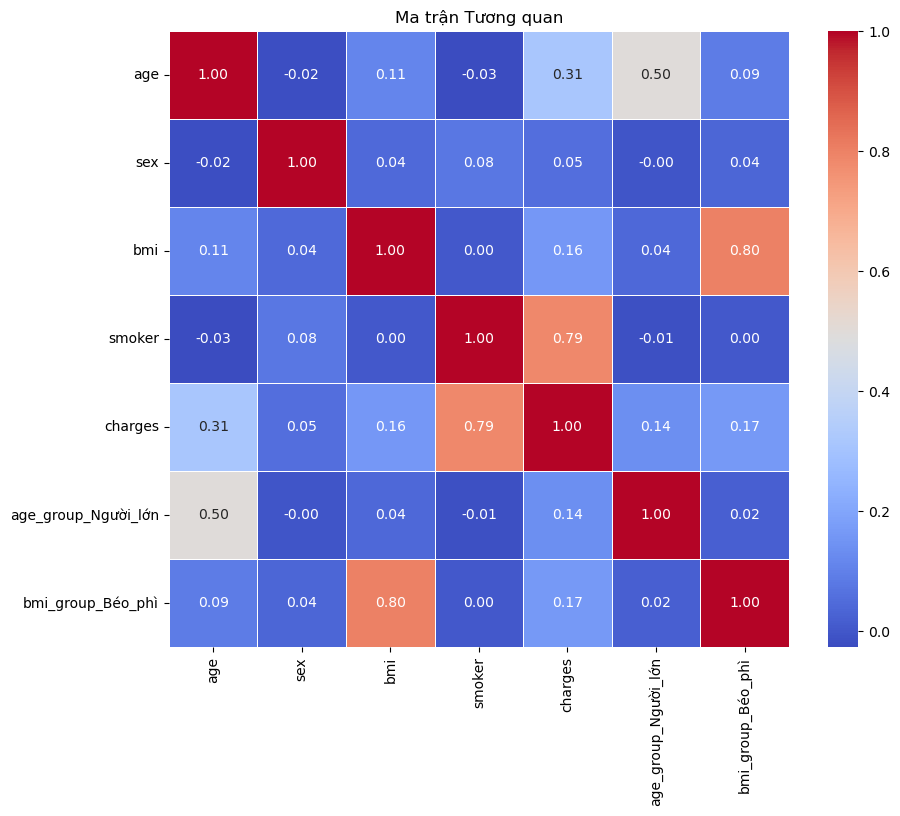

In [286]:
corr_matrix = dt.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận Tương quan')
plt.show()


**nhận xét**
1. Tương quan mạnh:

- smoker và charges có hệ số tương quan cao (0.79). Điều này cho thấy rằng việc hút thuốc có tác động lớn đến chi phí bảo hiểm y tế.
- bmi và bmi_group_Béo_phì có tương quan rất cao (0.80). Điều này hợp lý vì bmi_group_Béo_phì là một biến phân nhóm dựa trên giá trị của bmi.
2. Tương quan trung bình:

- age và charges có hệ số tương quan trung bình (0.31), cho thấy tuổi tác cũng có ảnh hưởng đến chi phí bảo hiểm, nhưng không quá mạnh.
- age và age_group_Người_lớn có tương quan trung bình (0.50), điều này cũng hợp lý vì age_group_Người_lớn là nhóm tuổi được tạo ra từ biến age.

3. Tương quan yếu:

- Hầu hết các biến còn lại có tương quan yếu với nhau, chẳng hạn như sex, age, bmi, và các nhóm khác, cho thấy không có mối liên hệ mạnh giữa những biến này.

4. Kiểm tra tính đa tuyến tính:

- Cặp biến bmi và bmi_group_Béo_phì có tương quan rất cao (0.80), điều này có thể dẫn đến đa tuyến tính nếu cả hai biến được sử dụng trong mô hình hồi quy.
- Tương tự, age và age_group_Người_lớn cũng có tương quan khá cao (0.50), điều này có thể gây ra vấn đề đa tuyến tính trong mô hình.

**Kết luận:**
- Để tránh đa tuyến tính, nên loại bỏ hoặc chỉ sử dụng một biến trong cặp biến có tương quan cao trong mô hình. Ví dụ:
- Giữa bmi và bmi_group_Béo_phì, bạn có thể chỉ giữ lại một biến (chẳng hạn, sử dụng trực tiếp bmi).
- Tương tự, giữa age và age_group_Người_lớn, chỉ nên giữ một trong hai biến.

**B: NÂNG CAO CHẤT LƯỢNG MÔ HÌNH**

In [288]:
dc = dt.copy()

In [290]:
dc

,age,sex,bmi,smoker,charges,age_group_Người_lớn,bmi_group_Béo_phì
0,0.021739,0,0.380482,1,0.470873,False,False
1,0.000000,1,0.567536,0,0.018033,False,True
2,0.217391,1,0.542999,0,0.099402,True,True
3,0.326087,1,0.214937,0,0.623206,True,False
4,0.304348,1,0.411711,0,0.081998,True,False
...,...,...,...,...,...,...,...
1331,0.695652,1,0.478311,0,0.283146,True,True
1332,0.000000,0,0.508584,0,0.032384,False,True
1333,0.000000,0,0.665684,0,0.015174,False,True
1334,0.065217,0,0.313563,0,0.026469,True,False


In [108]:
# biến đổi charges
dc['log_charges'] = np.log(dc['charges']+ 1e-9)
dc['sqrt_charges'] = np.sqrt(dc['charges'])
dc['charges_squared'] = dc['charges'] ** 2
dc['charges_cubed'] = dc['charges'] ** 3


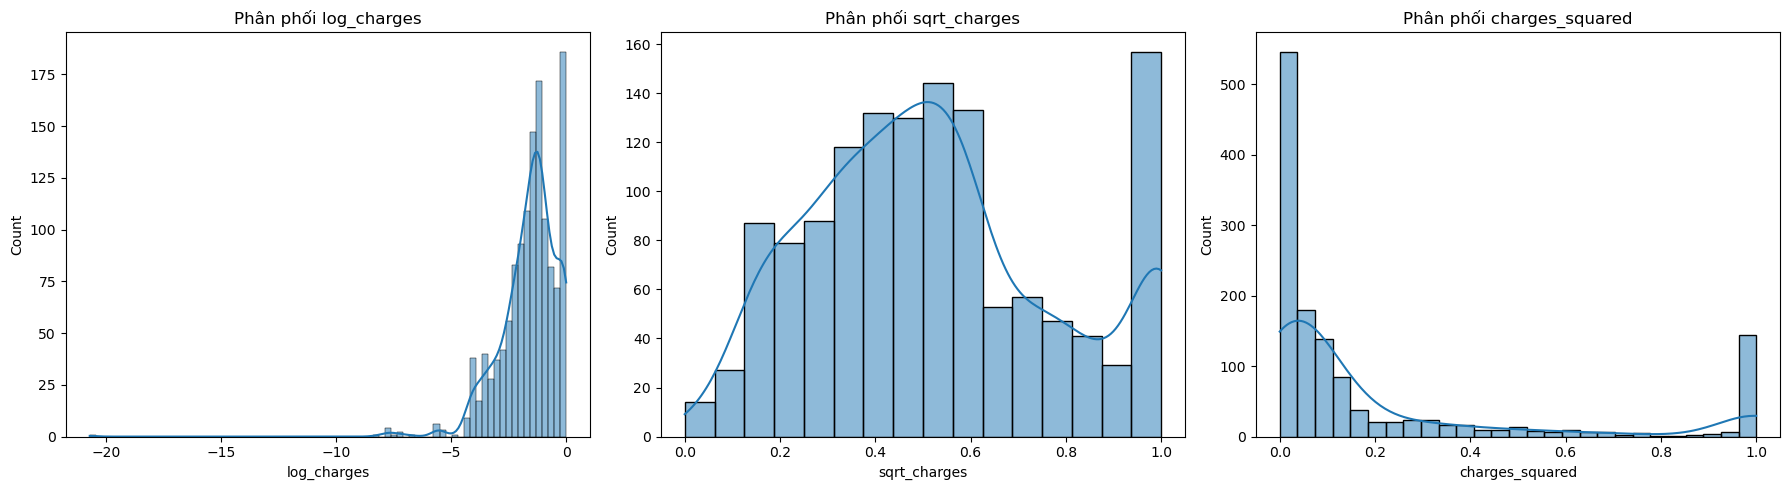

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(dc['log_charges'], kde=True, ax=axes[0])
axes[0].set_title('Phân phối log_charges')

sns.histplot(dc['sqrt_charges'], kde=True, ax=axes[1])
axes[1].set_title('Phân phối sqrt_charges')


sns.histplot(dc['charges_squared'], kde=True, ax=axes[2])
axes[2].set_title('Phân phối charges_squared')

plt.tight_layout()
plt.show()

In [110]:
# tạo biến tương tác age và bmi
dc['log_age_log_bmi'] =  np.log(dc['age']+ 1e+1) * np.log(dc['bmi'] + 1e+1)

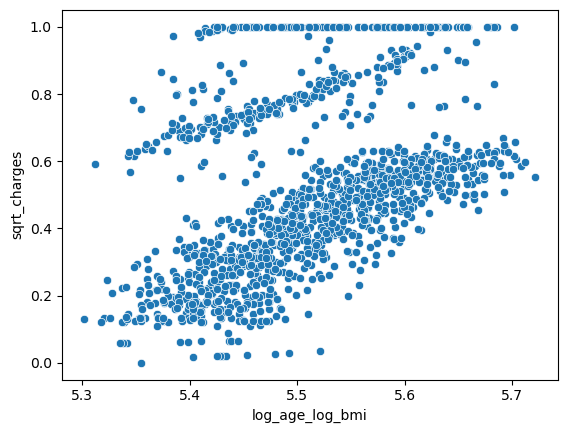

In [112]:
sns.scatterplot(x=dc['log_age_log_bmi'], y=dc['sqrt_charges']) 
plt.show()

In [113]:
#kiểm tra xem có giữ liệu thiếu sau khi tạo ra các biến tương tác hay không
dc.isnull().sum()

age                    0
sex                    0
bmi                    0
smoker                 0
charges                0
age_group_Người_lớn    0
bmi_group_Béo_phì      0
log_charges            0
sqrt_charges           0
charges_squared        0
charges_cubed          0
log_age_log_bmi        0
dtype: int64

In [114]:
#loại bỏ các biến không cần thiết
dcc = dc.drop(['log_charges', 'sex',
               'charges_squared', 'charges_cubed', 'age', 'bmi', 'charges'], axis=1)

In [115]:
dcc

,smoker,age_group_Người_lớn,bmi_group_Béo_phì,sqrt_charges,log_age_log_bmi
0,1,False,False,0.686202,5.392963
1,0,False,True,0.134287,5.429004
2,0,True,True,0.315280,5.474309
3,0,True,False,0.789434,5.425433
4,0,True,False,0.286353,5.465042
...,...,...,...,...,...
1331,0,True,True,0.532115,5.567477
1332,0,False,True,0.179957,5.416123
1333,0,False,True,0.123182,5.450291
1334,0,True,False,0.162692,5.388159


In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model_Age = scaler.fit(dcc[['log_age_log_bmi']])
dcc['log_age_log_bmi'] = model_Age.transform(dcc[['log_age_log_bmi']])

In [117]:
dcc


,smoker,age_group_Người_lớn,bmi_group_Béo_phì,sqrt_charges,log_age_log_bmi
0,1,False,False,0.686202,0.217131
1,0,False,True,0.134287,0.303067
2,0,True,True,0.315280,0.411089
3,0,True,False,0.789434,0.294552
4,0,True,False,0.286353,0.388992
...,...,...,...,...,...
1331,0,True,True,0.532115,0.633234
1332,0,False,True,0.179957,0.272354
1333,0,False,True,0.123182,0.353823
1334,0,True,False,0.162692,0.205676


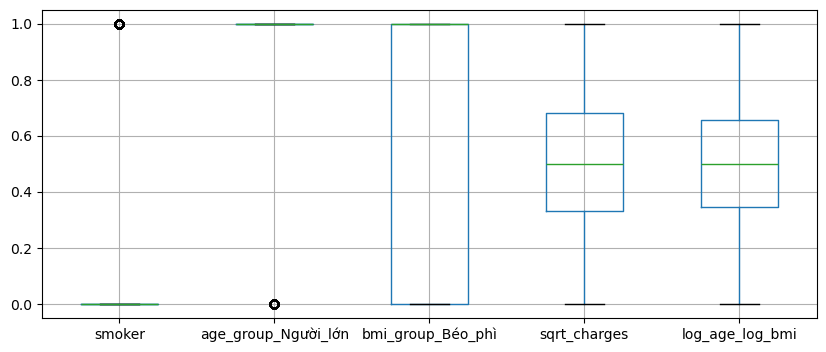

In [118]:
#kiểm tra các giá trị ngoại lai của tập dữ liệu mới
plt.figure(figsize=(10,4))
dcc.boxplot()
plt.ylabel('')
plt.show()

**nhận xét**
- có giá trị ngoại lai nhưng chúng ta không thể sử lý chúng các dữ liệu phân loại này đã bị chuyển đổi chỉ có hai gia strij true/false nếu áp dụng các bước xử lý ngoại lai sẽ  làm mô hình sai lệnh 

In [120]:
correlation_matrix = dcc.corr()
print(correlation_matrix['sqrt_charges'].sort_values(ascending=False))

sqrt_charges           1.000000
smoker                 0.724426
log_age_log_bmi        0.428562
age_group_Người_lớn    0.241955
bmi_group_Béo_phì      0.131978
Name: sqrt_charges, dtype: float64


**nhận xét**
1. Phân tích hệ số tương quan:
- sqrt_charges: Hệ số tương quan với chính nó là 1.000, điều này là bình thường.
- smoker (0.724426): Hệ số tương quan cao, cho thấy rằng tình trạng hút thuốc có ảnh hưởng mạnh đến giá trị mục tiêu. Nên giữ biến này.
- sex_smoker (0.543809): Biến này có tương quan khá mạnh với sqrt_charges. Đây có thể là biến tương tác giữa giới tính và tình trạng hút thuốc. Nên giữ biến này.
- log_age_log_bmi (0.428562): Tương quan này cho thấy rằng có một mối liên hệ tương đối giữa độ tuổi, chỉ số BMI và giá trị mục tiêu. Nên giữ biến này, nhất là nếu bạn tin rằng mối liên hệ giữa các biến này có thể cung cấp thông tin quý giá.
- age_group_Người_lớn (0.241955): Tương quan khá thấp, nhưng vẫn có thể có ý nghĩa. Tuy nhiên, nếu có các biến khác cung cấp thông tin tương tự, bạn có thể xem xét loại bỏ biến này.
- bmi_group_Béo_phì (0.131978): Tương quan rất thấp với giá trị mục tiêu. Có thể không cung cấp thêm thông tin đáng kể và có thể loại bỏ biến này.

**Khuyến nghị:**
1. Giữ lại:
- smoker
- log_age_log_bmi
2. Có thể giữ hoặc loại bỏ:
- age_group_Người_lớn: Giữ lại nếu bạn có lý do cụ thể (ví dụ, nếu bạn muốn kiểm tra ảnh hưởng của các nhóm tuổi cụ thể).
3. Loại bỏ:
- bmi_group_Béo_phì: Có vẻ như không cung cấp nhiều thông tin cho mô hình.

In [122]:
dccc = dcc.drop(['bmi_group_Béo_phì', 'age_group_Người_lớn'], axis=1)

In [123]:
# tách biến phụ thuộc và độc lập
Xx = dccc[["log_age_log_bmi", "smoker"]]  # Các biến đầu vào
yy = dccc[["sqrt_charges"]]  # Biến mục tiêu

In [124]:
olss_formula = "sqrt_charges ~ smoker + log_age_log_bmi"

In [125]:
olss_data = pd.concat([Xx, yy], axis =1)
OLS = ols(formula = olss_formula, data = olss_data)
model = OLS.fit()

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sqrt_charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1722.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:08:35   Log-Likelihood:                 766.84
No. Observations:                1336   AIC:                            -1528.
Df Residuals:                    1333   BIC:                            -1512.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1444      0.010     14.206      0.000       0.124       0.164
smoker              0.4685      0.009     50.662      0.000       0.450       0.487
log_age_log_bmi     0.5641      0.018     30.612      0.000       0.528       0.600
==============================================================================
Omnibus:                      351.247   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.593
Skew:                           1.355   Prob(JB):                    2.57e-209
Kurtosis:                       6.148   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Độ phù hợp của mô hình:
- R-squared: 0.721 — Khoảng 72.1% sự biến động của biến phụ thuộc sqrt_charges được giải thích bởi các biến độc lập smoker và log_age_log_bmi. Đây là một giá trị tương đối cao và cho thấy mô hình có thể giải thích tốt một phần lớn sự biến động của sqrt_charges.
- Adj. R-squared: 0.721 — Giá trị này gần tương đương với R-squared, cho thấy không có vấn đề về việc sử dụng biến dư thừa trong mô hình.
- F-statistic: 1722 và Prob(F-statistic): 0.00 — Giá trị F rất cao cùng với p-value gần bằng 0 cho thấy mô hình tổng thể có ý nghĩa thống kê, tức là các biến độc lập có tác động đáng kể đến biến phụ thuộc.
2. Thông số của các biến độc lập:
- Intercept (hệ số chặn): -6.9873, với p-value = 0.000. Điều này có nghĩa là khi các biến độc lập bằng 0, giá trị dự đoán của sqrt_charges là -6.9873. Tuy nhiên, việc có hệ số chặn âm có thể không mang ý nghĩa thực tiễn trong ngữ cảnh này.

- smoker: Hệ số là 0.4685, với p-value = 0.000, cho thấy biến này có ý nghĩa thống kê rất cao. Người hút thuốc có xu hướng làm tăng giá trị căn bậc hai của charges thêm 0.4685 đơn vị.

- log_age_log_bmi: Hệ số là 1.3451, với p-value = 0.000, cho thấy biến này cũng có ý nghĩa thống kê cao. Logarithm của tuổi và BMI (sau khi biến đổi log) có ảnh hưởng tích cực lớn đến sqrt_charges. Mỗi lần tăng một đơn vị của biến này sẽ làm tăng giá trị căn bậc hai của charges thêm 1.3451 đơn vị.

3. Chẩn đoán mô hình:
- Omnibus: 351.247, Prob(Omnibus): 0.000 — Kiểm định Omnibus cho thấy mô hình không thỏa mãn giả định phân phối chuẩn của phần dư (p-value = 0.000).
- Jarque-Bera (JB): 960.593, Prob(JB): 2.57e-209 — Kiểm định này cũng cho thấy rằng phần dư không tuân theo phân phối chuẩn (p-value rất nhỏ, gần bằng 0). Điều này có thể ảnh hưởng đến độ chính xác của ước lượng và dự đoán.
- Skew: 1.355 và Kurtosis: 6.148 — Phần dư bị lệch phải và có phân phối phân kỳ (kurtosis > 3), cho thấy phần dư có đuôi dài và không phân phối chuẩn.
4. Durbin-Watson: 2.059:
Giá trị gần 2 cho thấy không có tự tương quan trong phần dư, điều này là tích cực cho mô hình.
5. Cond. No. (Condition Number): 6.35:
Giá trị này khá thấp, có thể chỉ ra vấn đề không có đa cộng tuyến trong mô hình.

**Kết luận:**
- Mô hình hồi quy này có độ giải thích tốt (R-squared cao), nhưng có một số vấn đề về giả định phân phối chuẩn của phần dư.
- Biến smoker và log_age_log_bmi đều có ý nghĩa thống kê và có tác động lớn đến giá trị sqrt_charges.
- Tuy nhiên, phần dư không phân phối chuẩn (kiểm định Omnibus và Jarque-Bera) 

**Hành động tiếp theo:**
- Cần kiểm tra và xử lý các vấn đề về phần dư không chuẩn, có thể bằng cách thử các biến đổi khác của dữ liệu hoặc sử dụng các phương pháp hồi quy khác như hồi quy mạnh (robust regression).


- Mô hình 1 (charges) có R-squared cao hơn, cho thấy mô hình này giải thích biến động của biến phụ thuộc tốt hơn.
- Mô hình 2 (sqrt_charges) có các chỉ số AIC và BIC tốt hơn, Log-Likelihood cao hơn, cho thấy nó phù hợp tốt hơn với dữ liệu.
- Mô hình 2 có phân phối phần dư tốt hơn với giá trị Omnibus và Jarque-Bera thấp hơn.

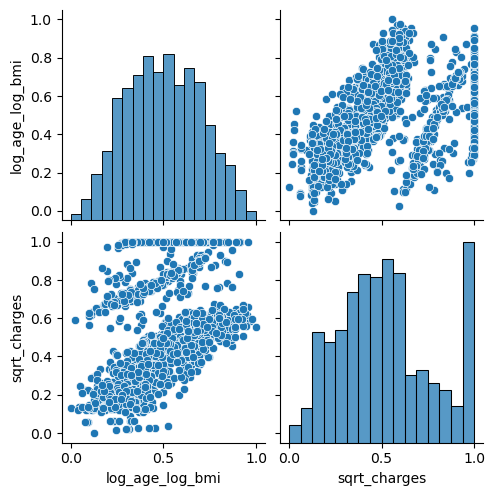

In [129]:
sns.pairplot(dccc[[ 'log_age_log_bmi', 'sqrt_charges']])


**nhận xét:**
1. Phân phối các biến:

- Sau khi chuyển đổi, phân phối của log_age_log_bmi gần như có dạng phân phối chuẩn với độ lệch ít hơn so với phân phối ban đầu của age và bmi.
- Biến sqrt_charges vẫn có một số bất đối xứng, nhưng so với phân phối ban đầu của charges, nó đã bớt nghiêng hơn và dữ liệu phân bố đều hơn.

2. tương quan giữa các biến:

- Mối quan hệ giữa log_age_log_bmi và sqrt_charges thể hiện một xu hướng tuyến tính mạnh hơn so với biểu đồ trước. Điều này có nghĩa là việc chuyển đổi đã giúp cải thiện tính tuyến tính giữa hai biến.
- Mối quan hệ giữa log_age_log_bmi và sqrt_charges vẫn có sự phân tán, nhưng các điểm dữ liệu đã được sắp xếp theo xu hướng có tính tuyến tính hơn so với trước.

3. So sánh với biểu đồ trước:
- Cải thiện tính tuyến tính:

  + Rõ ràng rằng việc áp dụng các phép biến đổi logarit và căn bậc hai đã giúp cải thiện tính tuyến tính giữa các biến. Trước đây, mối quan hệ giữa age, bmi và charges không rõ ràng và khá phân tán, nhưng sau khi chuyển đổi, các biến này bắt đầu cho thấy mối quan hệ tuyến tính mạnh hơn.
  + Đặc biệt, sqrt_charges đã giảm bớt độ phân tán, và việc chuyển đổi giúp làm mềm dữ liệu, giúp các biến có thể phù hợp hơn với mô hình tuyến tính.

- Phân phối của các biến:

  + Việc chuyển đổi đã làm cho các phân phối trở nên gần với phân phối chuẩn hơn, đặc biệt là log_age_log_bmi. Điều này sẽ giúp mô hình hồi quy làm việc hiệu quả hơn.

**Kết luận:**
Việc sử dụng các phép biến đổi log và căn bậc hai đã cải thiện tính tuyến tính và sự phân bố dữ liệu so với biểu đồ ban đầu. Điều này cho thấy bạn có thể đạt được một mô hình dự đoán tốt hơn bằng cách sử dụng các biến đã chuyển đổi này.

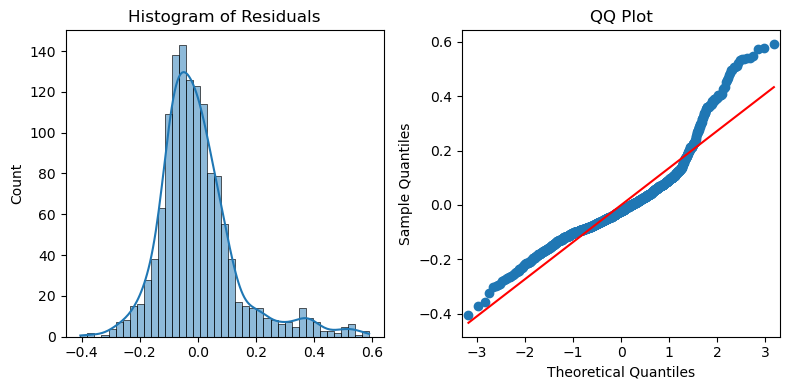

In [131]:
#kiểm tra tính chuẩn tắc
import statsmodels.formula.api as smf

# Giả sử bạn có dữ liệu trong DataFrame your_data
model = ols(formula = olss_formula, data = olss_data).fit()
residuals = model.resid

# Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Histogram
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Residuals')

# QQ-plot
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

**nhận xét**
1. Histogram of Residuals:

- Hình dạng có vẻ đồng nhất hơn so với biểu đồ trước.
- Số lượng giá trị ngoại lai có thể giảm xuống, nhưng vẫn còn một số phân tán đáng chú ý ở phía bên trái và bên phải.
2. QQ Plot:

- Các điểm gần hơn với đường thẳng chuẩn hơn so với hai biểu đồ trước.
- Tuy nhiên, vẫn có một số độ lệch ở hai đầu, cho thấy rằng phân phối của các residuals vẫn chưa hoàn toàn thỏa mãn giả định về phân phối chuẩn.

**Kết luận:**
- Cải thiện trong mô hình: So với biểu đồ trước, biểu đồ cho thấy một sự cải thiện trong việc giảm thiểu các độ lệch và độ không đồng nhất của residuals.
- Tình trạng chưa đạt yêu cầu: Mặc dù có sự cải thiện, nhưng residuals vẫn chưa hoàn toàn thỏa mãn giả định về phân phối chuẩn, điều này có thể yêu cầu các biến đổi khác hoặc thử nghiệm với các mô hình khác.
- Theo dõi sự thay đổi: Sự thay đổi giữa các biểu đồ cho thấy rằng các điều chỉnh trong mô hình đã giúp cải thiện tính phù hợp, nhưng cần theo dõi và xem xét thêm để đạt được kết quả tốt hơn.

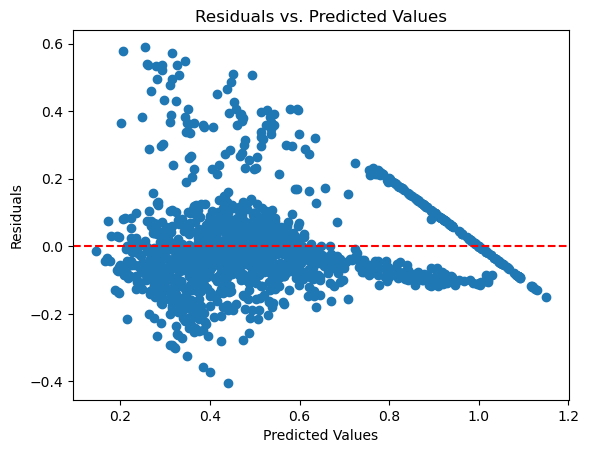

In [135]:
# tính đồng nhất
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

**nhận xét**
1. Tổng quan hình dạng:

- Biểu đồ có nhiều sự phân tán rộng hơn so với biểu đồ trước đó. Các điểm dữ liệu phần lớn phân bố ở khu vực xung quanh đường cơ sở (đường chấm đỏ), nhưng không đồng đều. Đặc biệt, có sự tập trung các phần dư ở giá trị dự đoán thấp (dưới 0.5) và phần dư dương xuất hiện rõ rệt hơn so với biểu đồ trước đó.
- Các giá trị dự đoán lớn (từ 0.7 trở lên) cho thấy một số phần dư lớn và âm, tạo thành một nhóm dữ liệu riêng biệt rõ ràng.

2. Sự phân tán:

- Biểu đồ thể hiện sự phân tán lớn hơn biểu đồ trước đó. Dữ liệu ở khoảng giá trị dự đoán nhỏ hơn 0.5 có xu hướng phần dư phân tán từ -0.4 đến 0.6. Các giá trị dự đoán lớn hơn (khoảng 0.7 đến 1.2) thể hiện một đường nghiêng về phía âm, cho thấy rằng mô hình dự đoán khá không chính xác tại những điểm này.
- Cũng như biểu đồ trước, có sự tập trung của phần dư ở gần đường cơ sở với nhiều điểm nằm xung quanh giá trị 0, nhưng mức độ phân tán của các điểm này lớn hơn.

3. Xu hướng phi tuyến tính:

- Biểu đồ cũng cho thấy xu hướng phi tuyến tính khá rõ ràng với các phần dư giảm dần khi giá trị dự đoán tăng lên, đặc biệt là các điểm dữ liệu nằm ở giá trị dự đoán lớn hơn 0.7. Điều này cho thấy mô hình có xu hướng không phù hợp với dữ liệu trong những khoảng này và không bắt kịp các mối quan hệ phi tuyến.

4. Sự không đồng nhất:

- Có dấu hiệu rõ rệt của heteroscedasticity (phương sai thay đổi), khi các phần dư ở các giá trị dự đoán lớn (trên 0.7) có xu hướng tập trung thành một cụm và có phương sai khác biệt so với các phần dư ở giá trị dự đoán thấp. Điều này có thể dẫn đến các ước lượng của mô hình hồi quy không chính xác.
5. So sánh giữa biểu đồ trước và biểu đồ này:

- Phân tán và cụm dữ liệu:

  + Biểu đồ trước có sự phân tán rộng hơn so với biểu đồ này, đặc biệt là ở các phần dư có giá trị dự đoán nhỏ (dưới 0.5). Các cụm dữ liệu trong biểu đồ này dường như được sắp xếp có hệ thống và chặt chẽ hơn so với biểu đồ trước , trong khi biểu đồ trước cho thấy sự phân tán lớn hơn, không có cụm rõ ràng.
- Xu hướng phi tuyến:

  + Cả hai biểu đồ đều thể hiện xu hướng phi tuyến ở những giá trị dự đoán cao, nhưng trong biểu đồ này, xu hướng này ít rõ ràng hơn và có vẻ như phương sai giữa các phần dư đã được kiểm soát tốt hơn.

- Sự cải thiện về phương sai:

  + Biểu đồ cho thấy có sự cải thiện về tính đồng nhất của phương sai, khi các phần dư có xu hướng tập trung nhiều hơn ở các giá trị nhỏ của dự đoán (dưới 0.5), và sự phân tán phương sai trong các giá trị dự đoán lớn hơn cũng ít xuất hiện hơn. Biểu đồ trước có sự phân tán phương sai không đồng đều ở cả hai khoảng giá trị dự đoán thấp và cao, trong khi biểu đồ cho thấy mức độ kiểm soát phương sai tốt hơn.

**Kết luận:**

- Biểu đồ trước cho thấy một mô hình có sự phân tán lớn và xu hướng phi tuyến không được xử lý tốt, với phần dư lan rộng và không đồng đều. Có dấu hiệu của heteroscedasticity rõ ràng hơn so với biểu đồ.
- Biểu đồ này thể hiện một sự cải thiện nhất định trong việc kiểm soát phương sai và mô hình hóa dữ liệu, với các cụm phần dư rõ ràng và sự giảm thiểu phân tán. Tuy nhiên, vẫn còn một số vấn đề về xu hướng phi tuyến trong khoảng dự đoán cao.
- Sự cải thiện: Biểu đồ đã cải thiện về phương sai và độ tập trung của các phần dư, đặc biệt là ở các giá trị dự đoán nhỏ hơn 0.5. Tuy nhiên, cả hai biểu đồ đều chỉ ra rằng mô hình cần phải xử lý tốt hơn các mối quan hệ phi tuyến và xem xét các phương pháp hồi quy phức tạp hơn hoặc các biến chuyển đổi để cải thiện dự đoán cho các giá trị lớn.

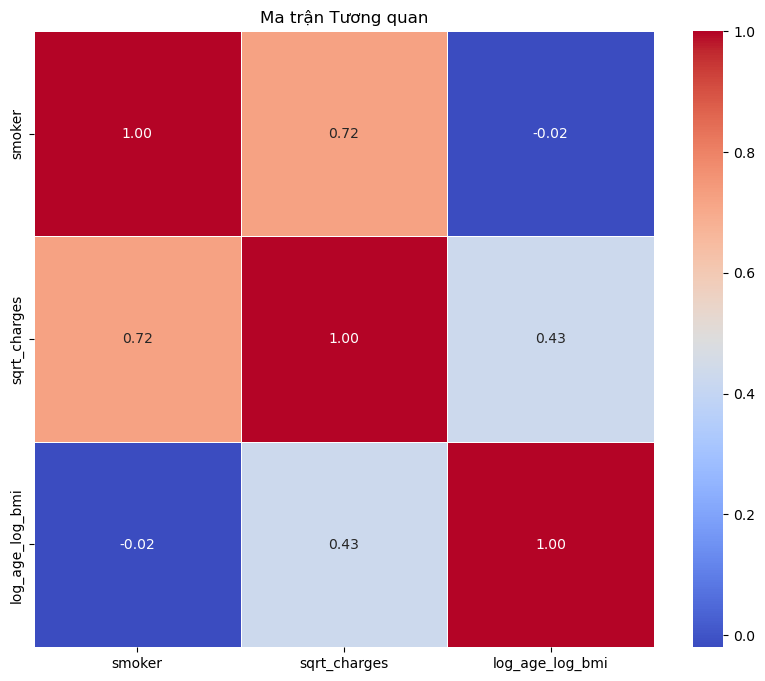

In [137]:
corr_matrix = dccc.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận Tương quan')
plt.show()


**nhận xét**
1. Mối Quan Hệ Giữa Các Biến:

- Giữa smoker và sqrt_charges: Tương quan cao (0.72) cho thấy rằng những người hút thuốc có chi phí bảo hiểm cao hơn. Mối quan hệ này khá mạnh, cho thấy rằng việc hút thuốc là một yếu tố quan trọng ảnh hưởng đến chi phí.
- Giữa sqrt_charges và log_age_log_bmi: Tương quan dương (0.43) cho thấy rằng chi phí bảo hiểm (sau khi áp dụng căn bậc hai) có mối liên hệ tích cực với logarit của độ tuổi và BMI. Điều này có thể chỉ ra rằng khi một hoặc cả hai biến này tăng lên, chi phí bảo hiểm cũng có xu hướng tăng.

2. Tương Quan Thấp hoặc Âm:

- Giữa log_age_log_bmi và smoker: Tương quan thấp (-0.02) cho thấy rằng không có mối quan hệ rõ ràng giữa việc hút thuốc và logarit của độ tuổi và BMI. Điều này có thể chỉ ra rằng không phải tất cả những người hút thuốc đều có BMI cao hoặc ngược lại.

3. Kiểm tra tính đa tuyến tính:
Tính đa tuyến tính xảy ra khi các biến độc lập có tương quan cao với nhau, gây khó khăn cho các mô hình hồi quy.
- Cặp biến smoker và sqrt_charges có tương quan khá cao (0.72). Tuy nhiên, vì chúng có quan hệ lý thuyết hợp lý (hút thuốc ảnh hưởng đến chi phí bảo hiểm), mức tương quan này không quá đáng lo ngại nhưng cần lưu ý.
- Cặp biến log_age_log_bmi với các biến còn lại đều có tương quan thấp (-0.02 với smoker và 0.43 với sqrt_charges), cho thấy không có dấu hiệu đa tuyến tính mạnh giữa chúng.

**Kết luận:**
- Đa tuyến tính không đáng kể: Chỉ có một mối tương quan mạnh giữa smoker và sqrt_charges, nhưng mối quan hệ này có thể hợp lý trong ngữ cảnh phân tích.
- Cần kiểm tra thêm với VIF (Variance Inflation Factor) để có cái nhìn rõ ràng hơn về mức độ đa tuyến tính trong mô hình. Nếu VIF của một biến cao (thường lớn hơn 5 hoặc 10), có thể sẽ cần loại bỏ hoặc điều chỉnh biến đó.

**tổng quát**
- Mối quan hệ mạnh mẽ giữa việc hút thuốc và chi phí bảo hiểm nhấn mạnh tầm quan trọng của yếu tố này trong việc đánh giá chi phí bảo hiểm.
- Tương quan vừa phải giữa chi phí bảo hiểm (căn bậc hai) và logarit của độ tuổi và BMI cũng chỉ ra rằng có thể có một mối quan hệ gián tiếp giữa chúng.
- Việc xem xét các biến đã được biến đổi như sqrt_charges và log_age_log_bmi có thể giúp trong việc cải thiện mô hình dự đoán chi phí bảo hiểm.
- Đa tuyến tính không đáng kể

In [139]:
X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size=0.3, random_state=42)


In [140]:
#tính toán các chỉ số
y_pred_linear = model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print('----------')
print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R2: {r2_linear}")

----------
MAE: 0.0961150335185773
MSE: 0.018127571639079867
RMSE: 0.13463867066738244
R2: 0.7247227284299986


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [141]:
model = LinearRegression()

# Huấn luyện mô hình với tập dữ liệu huấn luyện
model.fit(X_train, y_train)

LinearRegression()

In [142]:
print("hệ số hồi quy:", model.coef_)
print("hệ số chặn:", model.intercept_)
print("điểm số r2:", model.score(X_train, y_train))
print("số lượng đặc trưng:", model.n_features_in_)

hệ số hồi quy: [[0.56744897 0.47629361]]
hệ số chặn: [0.14346996]
điểm số r2: 0.7194841294901088
số lượng đặc trưng: 2



1. Tập Train:

- MAE (Mean Absolute Error): 0.0944
- MSE (Mean Squared Error): 0.0187
- RMSE (Root Mean Squared Error): 0.1367
- R² (Coefficient of Determination): 0.7247

2. Tập Test:

- R²: 0.7194

**nhận xét**

- MAE, MSE, và RMSE đều khá thấp, cho thấy sai số trung bình của mô hình không lớn, có nghĩa là các dự đoán của mô hình khá chính xác so với giá trị thực tế.
- R² trên tập train là 0.7247, nghĩa là mô hình có khả năng giải thích được khoảng 72,47% biến thiên của biến phụ thuộc, đây là mức độ tương đối tốt.
- R² trên tập test là 0.7194, cũng gần với tập train, điều này cho thấy mô hình có khả năng tổng quát hóa tốt và không có hiện tượng overfitting.

**Kết luận:**
- Không có dấu hiệu overfitting: Vì R² của tập test gần với R² của tập train.
- Không có dấu hiệu underfitting: Mô hình có hiệu suất tốt trên cả hai tập dữ liệu.
- Mô hình này đang hoạt động tốt, với các lỗi nhỏ và khả năng giải thích dữ liệu khá ổn, cho thấy sự phù hợp với dữ liệu hiện tại.







1.	Tóm tắt tình hình mô hình
-	Mặc dù các chỉ số đánh giá mô hình như R-squared và MSE cho thấy mô hình hồi quy tuyến tính hoạt động khá tốt trong việc dự đoán chi phí y tế, việc vi phạm các giả định về tính chuẩn tắc của phần dư và tính đồng nhất của sai số đã làm giảm tính đáng tin cậy của mô hình.
2.	Đánh giá vi phạm giả định
-	Tính chuẩn tắc: Vi phạm giả định về tính chuẩn tắc có thể dẫn đến sai lệch trong ước lượng và các khoảng tin cậy không chính xác. Điều này có nghĩa là các kết luận về mối quan hệ giữa các biến không thể được tin cậy hoàn toàn.
-	Tính đồng nhất: Vi phạm tính đồng nhất (nếu phần dư không phân phối đồng nhất) có thể làm cho các ước lượng hồi quy không chính xác, dẫn đến việc phần dư không phân phối một cách đều đặn qua các giá trị dự đoán. Điều này cũng có thể khiến cho các giả định về các độ lệch trong dự đoán không còn chính xác.
3.	Tác động của vi phạm giả định
-	Tính chính xác của dự đoán: Việc vi phạm các giả định này có thể dẫn đến việc mô hình không đưa ra dự đoán chính xác cho các giá trị chi phí y tế trong thực tế, mặc dù mô hình có thể phù hợp tốt với dữ liệu huấn luyện.
-	Rủi ro trong quyết định: Sử dụng mô hình này để đưa ra các quyết định quan trọng có thể gây rủi ro, vì các kết quả dự đoán có thể không phản ánh đúng thực tế.
4.	Đề xuất cải thiện
-	Cải thiện mô hình: Nên xem xét các phương pháp cải thiện mô hình như:
-	Kiểm tra và xử lý phần dư: Phân tích thêm về phần dư để xác định các mô hình phù hợp hơn, chẳng hạn như kiểm tra sự hiện diện của các biến không quan sát được hoặc tương tác giữa các biến độc lập.
-	Sử dụng mô hình khác: Có thể xem xét sử dụng các mô hình hồi quy phi tuyến, mô hình hồi quy bậc cao, hoặc các phương pháp học máy khác mà không yêu cầu các giả định nghiêm ngặt như hồi quy tuyến tính.
5.	 Kết luận cuối cùng
-	Dựa trên những vi phạm về giả định tính chuẩn tắc và tính đồng nhất của phần dư, mặc dù các chỉ số tính toán của mô hình là khả quan, nhưng không nên sử dụng mô hình hồi quy tuyến tính này để dự đoán chi phí y tế. Các quyết định dựa trên mô hình này có thể không chính xác và không đáng tin cậy. Cần thiết phải xem xét các phương pháp hoặc mô hình thay thế để đảm bảo tính chính xác và độ tin cậy của dự đoán trong thực tế.


## 